# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [2]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 56.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=cadb364da635c159260b0e86b47de3ab383b56eec8a8c66b633782e94a92f541
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [3]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [4]:
if not os.path.exists("malgun.ttf"): 
    wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
    fm.fontManager.addfont("malgun.ttf")
if plt.rcParams['font.family']!= ["Malgun Gothic"]:
    plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
FONT_PATH = "malgun.ttf"

HTTPError: ignored

In [5]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family = 'NanumBarunGothic')

### 1-4. 자바 경로 설정(Windows)

In [6]:
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [7]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,291 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [8]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [10]:
train_df = pd.read_csv('/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/train.csv')

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [11]:
import nltk
nltk.download('stopwords')
from konlpy.tag import Okt
from mecab import MeCab
mecab = MeCab()
okt = Okt()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def mecab_tokenizer(string):
    return list("/".join(res) for res in mecab.pos(str(string)))

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [13]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass
    print("*"*120)
    if label is None:
        text_question = df['text'].reset_index(drop=True)
        display(df.label.value_counts())
        norm_label = df.label.value_counts(normalize=True)
        display(norm_label)
        norm_label.plot.bar(figsize=(5, 5), color = sns.color_palette('hls', n_colors = len(norm_label)))
        plt.show()
        df.info()
    else:
        text_question = df.loc[train_df['label'] == label, 'text'].reset_index(drop=True)
        display(f"유형: {label}", text_question.head(10))

#데이터 확인
    display(text_question.describe(include='all'))
#데이터 길이 분포 시각화
    text_length = text_question.apply(len)
    display(pd.DataFrame(text_length).describe().T)
    print("-"*120)
    print("최대 길이: ", text_question[text_length.argmax()])
    print("최소 길이: ", text_question[text_length.argmin()])

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1, title='max string lsngth : ' + str(max(text_length)))
    sns.histplot(text_length, bins=50)
    plt.grid()

    plt.subplot(2, 1, 2)
    sns.boxplot(x=text_length)
    plt.grid()
    plt.show()
    print("-" * 120)

    nouns = text_question.apply(lambda t:mecab.nouns(str(t)))
    nouns = nltk.Text(nouns.explode())
    nouns = nltk.Text([w for w in nouns if isinstance(w, str)])

#world cloud
    cloud = WordCloud(
        max_font_size=100,max_words=50,
        background_color='white',relative_scaling=1,
        width=800,height=600,font_path=FONT_PATH).generate(" ".join(nouns))
    plt.figure(figsize=(12,6))
    plt.imshow(cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

### 4-2. 각각의 문의 유형에 대해 실행합니다.

************************************************************************************************************************


'유형: 시스템 운영'

0           한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
1    안녕하세요 \n\n코딩마스터스 재밌게 하고 있는 에이블러입니다.\n\n코딩마스터스가...
2    금요일에 홈페이지 점검이 있다는 내용을 들었었는데, 금일 접속해 보니 다른 곳은 다...
3    운영자 02님 혹시 원격 기다리실까봐 문의글 남깁니다.\n어차피 오전시간 얼마 안 ...
4    안녕하세요 DX7조입니다.\n제출 버튼에 ppt 파일을 먼저 제출하고 나서 발표영상...
5    안녕하세요!\n\n갑자기 셀프 테스트를 보는 도중 창이 다 꺼지고 홈으로 돌아갔는데...
6    AIDU 환경에서 한번 나오면 시험 끝이라는 강사님 말씀을 듣고 질문을 남깁니다.\...
7    최종개별실습 파일제출시에 제가 다른 경로로 저장한 빈파일을 올려서 \n소스코드가 하...
8    채점 했을때는 전부 pass로 뜨는데 제출하면 오답이라고 하는데 제출할 때 다른 케...
9    11월 10일 개인과제 제출 버튼을 누르면 아래와 같은 화면이 뜨면서 과제 제출이 ...
Name: text, dtype: object

count                                            561
unique                                           561
top       한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
freq                                               1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,561.0,89.613191,71.10484,10.0,46.0,71.0,113.0,650.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  안녕하십니까 다름아니라 8월 11일에 치룬 셀프테스트 결과를 확인하고 문의드릴점이 있어 글을 작성하게되었습니다 다름아니라 A-2번 문제는 실습A-2에서 실수값을 갖는 열의 개수를 구하는 문제입니다 저는 해당 문제를 풀기위해 info()함수를 제대로 이용하여 실수형 열의 개수를 구했습니다 저는 앞선 문제에서 mall 데이터에 열을 추가하는 문제를 먼저 푸는 바람에 A-2번 문제를 풀게되었을때 실수형태의 열 개수가 추가되어 기존의 실수형 형태의 열 개수가 2개에서 3개로 바뀌어 제 답안에는 실수형 열 개수가 3개라는 결과를 얻게되었습니다ㅠㅠ.. 이 경우에는 부분점수를 받거나 점수 변동이 가능할까요? 제 실습 파일을 보면 알 수 있듯이 사용해야하는 함수도 제대로 썼지만 앞서 열 추가 문제를 먼저 푸는 바람에 A-2번 문제를 풀때 열추가가된 것 같습니다.. 

추가로 95점 이상 남성을 구하는 문제에 있어 제가 등호표시를 &gt;로만 하여 아쉽게 오답으로 처리되었는데요.. 이 경우도 부분점수를 받을 수 있을까요?? 

그리고 이번 미니프로젝트 개별실습 채점방식은 앞서 오티때 말씀해주신것처럼 0~100점 형태의 점수표기가 아닌 NP/P 로 채점되는것인가요?? 

잘하고싶은 마음에 사소한것까지 하나하나 물어보게되었습니다 항상 성의껏 답변해주셔서 감사합니다!
최소 길이:  제출 오류가 뜹니다


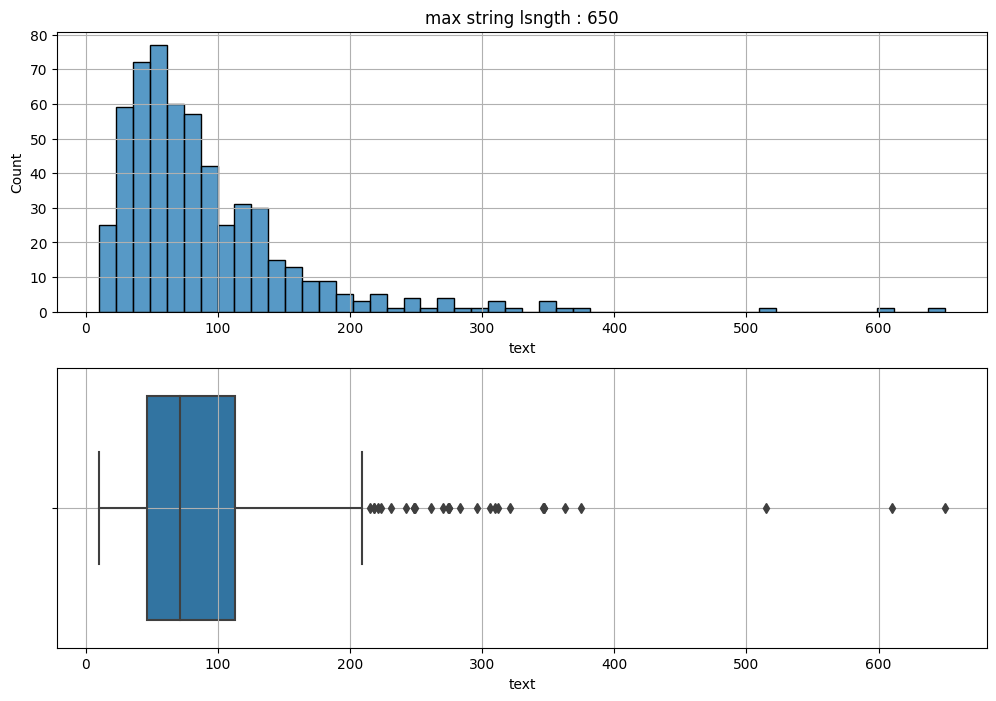

------------------------------------------------------------------------------------------------------------------------


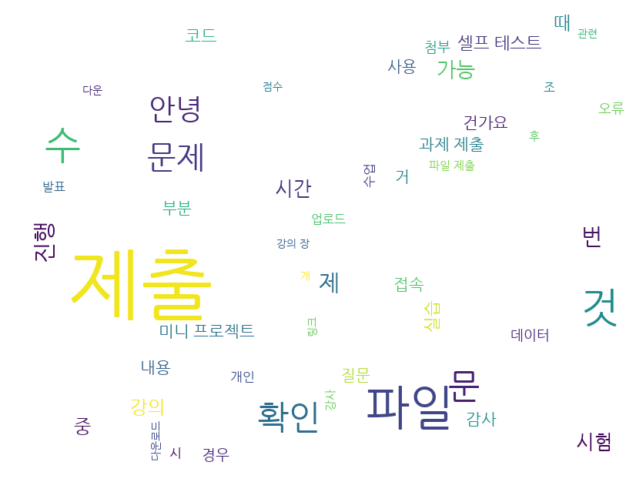

************************************************************************************************************************


'유형: 원격'

0    말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
1                  어떻게 삭제하는지 모르겠어요 ㅜ 원격지원 부탁드려도 될까요.. 
2    마지막으로 안내해주신 명령어대로 수행해봤는데 역시 에러메시지가 뜹니다 ㅠㅠ\n혹시 ...
3    https://113366.com?accessCode=107144링크로 접속 후 프...
4    네트워크 오류 관련 알려주신 내용 확인해 봤는데 안됩니다,,,, 원격 부탁드려도 되...
5    튜터님,\n\n말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.\n\n하지...
6                                   원격제어를 추가하는 것이 안됩니다
7                       1대1 원격조종으로 문제 해결 위해 남겨둔 질문입니다.
8    강사님께서 프로그램 다 종료하고 다시 가이드대로 해보라고 하셨는데도 계속 버츄얼 네...
9                        안녕하세요 깃허브 등록이안되서 원격제어 부탁드립니다.
Name: text, dtype: object

count                                                   100
unique                                                  100
top       말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,100.0,84.02,86.997037,9.0,39.75,58.0,104.25,683.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  튜터님,

말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.

하지만 아래 코드 실행시 또다른 에러가 발생합니다.
- C:\dev\mini_pro7&gt;python manage.py migrate
- C:\dev\mini_pro7&gt;python manage.py runserver

에러내용은 아래와 같습니다.
- OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못 
되었습니다: ''
- ModuleNotFoundError: No module named 'reference.urls'

문제 해결을 위해 https://bladewalker.tistory.com/713와 https://stackoverflow.com/questions/58873810/django-runserver-error-frozen-importlib-bootstrap를 참조하여
-  pip install --upgrade reference
- C:\dev\mini_pro7&gt;python manage.py makemigrations
코드를 실행하였으나 지속적으로 또다른 오류가 발생합니다.

---

다른 팀원분들께 여쭤보니 파이썬을 다시 삭제후 재설치를 권유하던데, 혹시 삭제후 재설치를 해야 할까요?
번거로우시겠지만, 원격으로 가상환경 세팅 도와주시면 정말 감사드리겠습니다.

최소 길이:  원격 부탁드립니다


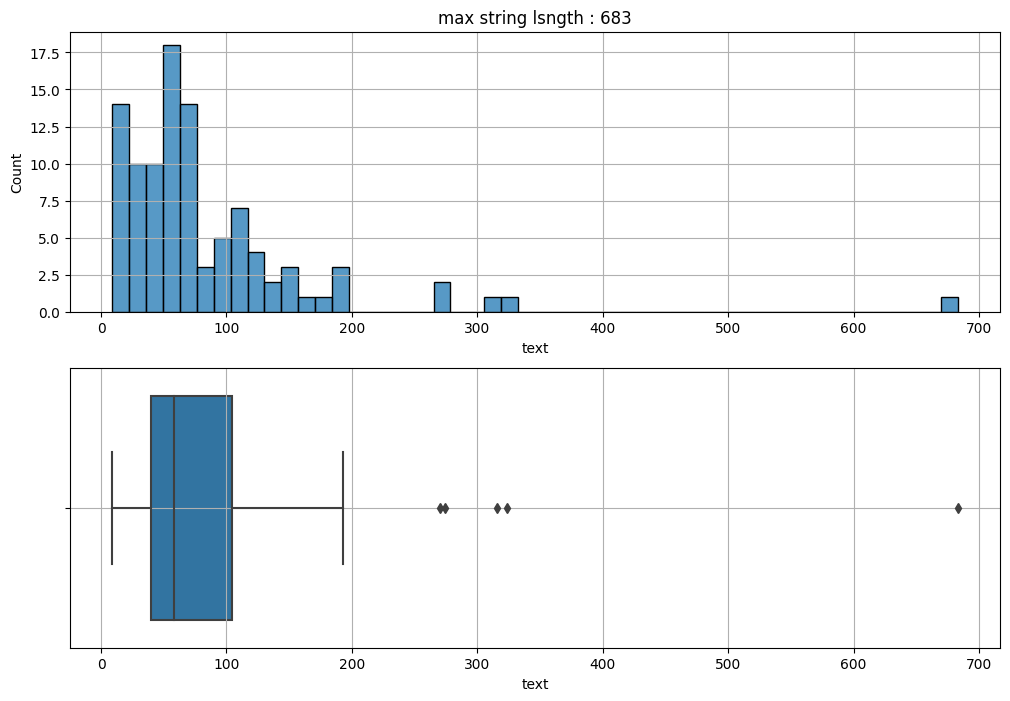

------------------------------------------------------------------------------------------------------------------------


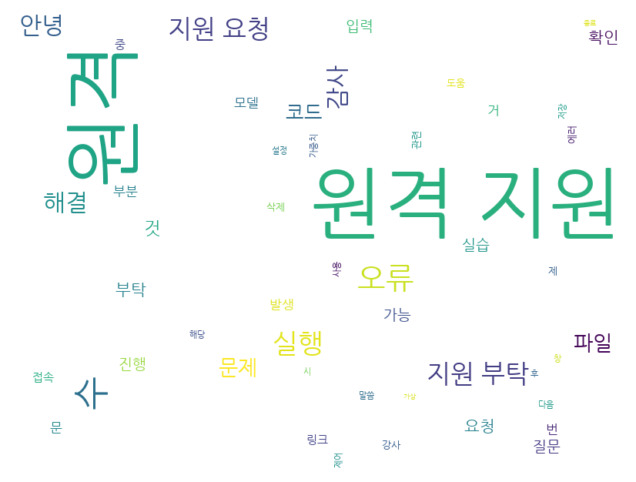

************************************************************************************************************************


'유형: 웹'

0    현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
1    PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...
2    다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...
3    윈도우 프롬프트에서 작업중 cd Downloads 이후 퍼블릭 DNS를 연결하면 e...
4    아니면 혹시 인스턴스가 종료되었는데 삭제하기가 보이지가 않아서 새로운 인스턴스를 만...
5    두번째로 주신 OneDrive에 window10.ova파일이 아직 업로드 되지 않은...
6    google sheet의 제  master IP를 찾아 복사한 뒤 인스턴스 목록에서...
7    라우팅 테이블 설정에서 프라이빗서브넷이 퍼블릭 라우팅 테이블로 설정을 하였습니다.\...
8    강사님이 주신 참조자료 보면서 만들고 있습니다.\nhttps://findwork.d...
9    아까 rows에서 s빼먹어서 넣고 다시 돌려봤을때는 분명 열 저체가 다 나왔었거든요...
Name: text, dtype: object

count                                                   732
unique                                                  732
top       현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,732.0,184.84153,448.83214,13.0,60.0,101.0,172.0,5690.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  $ python manage.py createsuperuser

You have 18 unapplied migration(s). Your project may not work properly until you apply the migrations for app(s): admin, auth, contenttypes, sessions.
Run 'python manage.py migrate' to apply them.
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\utils.py", line 84, in _execute
    return self.cursor.execute(sql, params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\mysql\base.py", line 73, in execute
    return self.cursor.execute(query, args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", line 206, in execute
    res = self._query(query)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", l

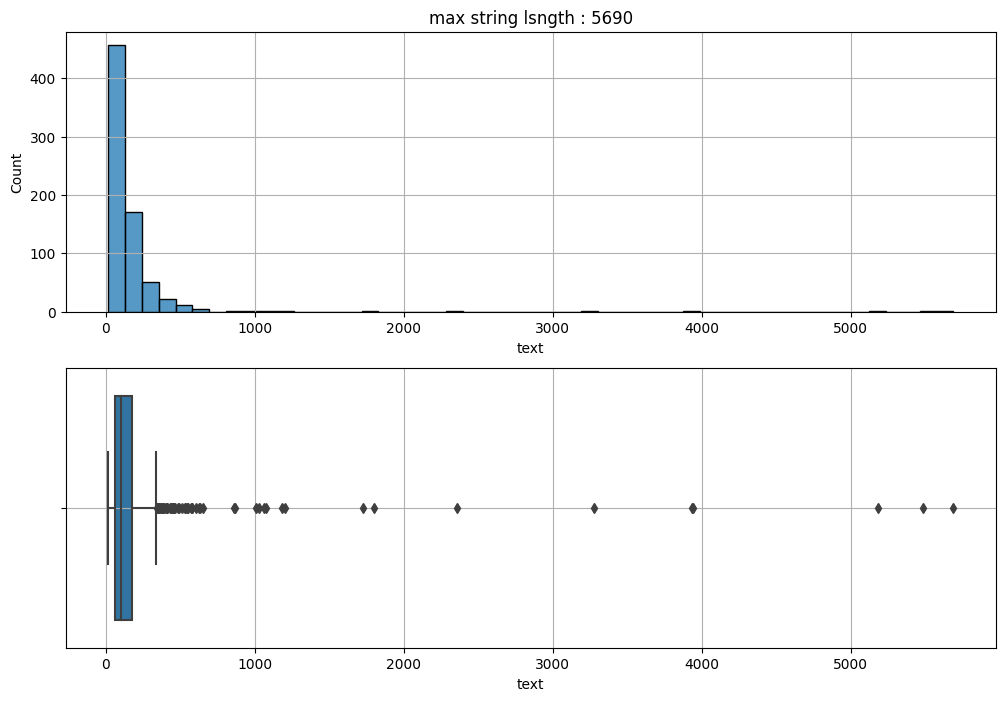

------------------------------------------------------------------------------------------------------------------------


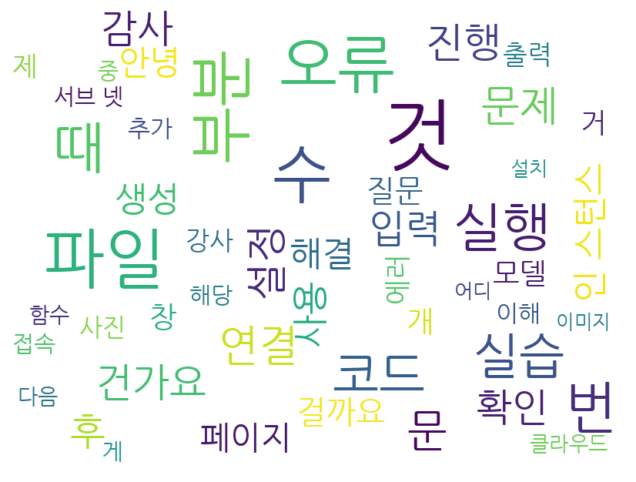

************************************************************************************************************************


'유형: 이론'

0    저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
1    범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...
2    안녕하세요.\n\n실습1 제출합니다.\n피드백 부탁드립니다.\n\n+) 추가로, 저...
3    아이피 중에 13.13.12.2와 13.13.23.2가 없는데 어떤 것을 연결하는건...
4    backbone은 기본 골자이고, head는 backbone을 바탕으로 목적에 맞게...
5    3. IDF가 높다는 것은 적은 수의 문서에서 나타난다는 뜻이므로 그 단어가 그 문...
6    [실습4]\n\n쿠팡의 경우 유통업이지만 오픈마켓으로도 분류할 수가 있는데 제가 작...
7    도메인 관련 논문 검색 후 유의미한 feature 1차로 추려내서 데이터 전처리하는...
8    변수와 타겟간 가설수립을 할 때 변수간 관계를 이용해 변수를 추가해서 사용해도 될까...
9    이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경...
Name: text, dtype: object

count                                                   728
unique                                                  728
top       저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,728.0,138.668956,101.730658,13.0,71.0,110.0,178.25,915.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  수업에서 cacoo랑 packet tracer를 배우는 이유가

1. IT 인프라 구조에 대해서 이해해보는 시간
- 비록 직접 인프라를 구축 및 설계는 하지 않을지라도 어떻게 구성되어 있고 어떻게 돌아가는지는 알아보자.
적절한 비유일지는 모르겠으나, 운전을 하는 게 목표라고 할 때, 
우리가 자동차를 직접 설계하고 만들지는 않아도 자동차가 연료를 연소시키면서 엔진에 동력을 전달해서 그 힘으로 움직인다. 라는 식으로 원리와 과정을 아는 것과 같은 맥락...이려나요?

2. (DX과정이므로 DX 컨설턴트 및 관련 직무를 위한 교육이라고 가정할 때) DX 관련 업무에서 실제로 IT 인프라를 구축해야하는 경우가 있으며, 이 때 실제 장비를 가지고 하나씩 연결해보고 시도해보기에는 물리적(시간, 돈, 장소 등)제약이 있으므로 가상으로 해본다.

3. 적절한 비유일지는 모르겠으나...
수학에서 미적분을 배우는 게 최종 목표라고 했을 때, 처음부터 미적분을 학습시킬 수 없으니 그 기초가 되는 수열, 수열의 극한, 함수의 극한 순으로 배우듯이 DX 컨설턴트 과정에서 기초라 할 수 있는 IT 인프라를 학습하는 과정에 있는 것이다.

상기한 3가지 이유인가요?

이전까지 계속 코딩과 데이터 전처리 및 분석으로 달려오다가 갑자기 가상 세계 속에서 무언가를 구성해보기도 하고, 도식화 해보기도 하니 순간 이걸 배우는 목적이 무엇인가? 라고 했을 때 말문이 막혀서 한번 질문 드렸습니다.

훌륭한 커리큘럼을 구성한 교육과정에서 배우는 입장에서 이러한 의문을 가지는 게 터무니 없을 수도 있으나 목적의식과 목표에 대해서 알면 무엇을 좀 더 중점적으로 학습해야 할지 알 수 있을 거 같아서 문의드립니다. ^^:

추가적으로 혹시 실례가 안 된다면 실무에서 cacoo와 

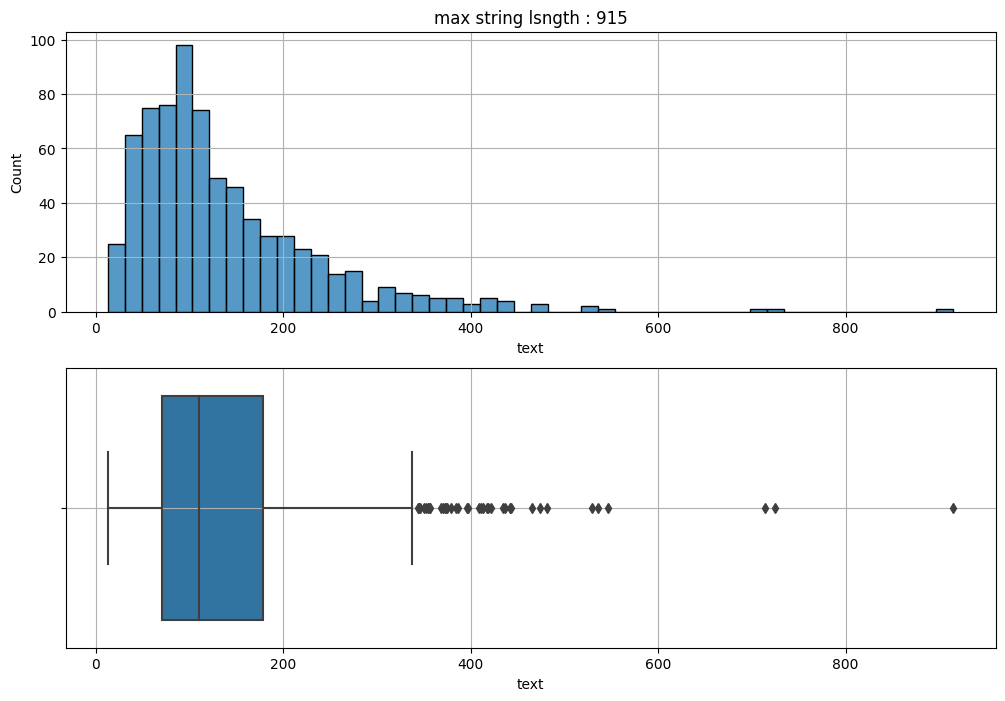

------------------------------------------------------------------------------------------------------------------------


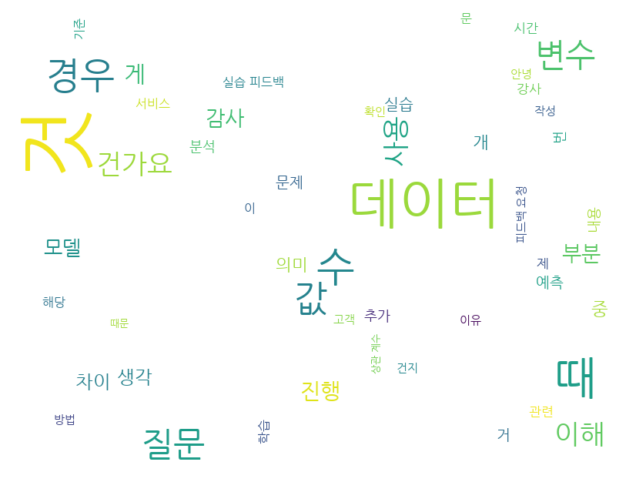

************************************************************************************************************************


'유형: 코드1'

0    첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
1    앗...제가 질문을 잘못드려서 혼란이 있으셨을 듯 합니다 죄송합니다...ㅠ\n원질문...
2    제가 All Failed를 말씀드린건.. 실행에는 아무문제가 없기 때문입니다...\...
3    안녕하세요! 3436번. 슬라이딩 퍼즐 문제 관련하여 질문드립니다.\n우선 3줄에 ...
4    안녕하세요, 답변에 감사드립니다. 3389 커트라인 정하기 추가 문의 드립니다. \...
5    52 54 55번은 모두 3360번 문제입니다..\n\n추가로 반복문 안에 조건문이...
6    안녕하세요 3417. 오리 농법 예제 입력 1의 예제 출력 1에 대해 질문 드립니다...
7    함수 say_hey를 만들어 보세요.\n횟수를 받는 입력 매개변수 count(숫자)...
8    w =int(input("수도사용량:"))\nb= input('회사명:')\ndef...
9    파이썬을 이번에 처음 배우게 되었습니다. 코딩마스터즈 테스트에서\n\nfrom sy...
Name: text, dtype: object

count                                                   488
unique                                                  488
top       첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,488.0,333.356557,316.485935,12.0,124.0,242.5,414.0,2655.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  import collections
import re
a=list(input()) # 반복시킬 문자열 받기
b= input() # 목적
c=0 # 반복 횟수
y = [] # 반복할 문자열 갯수 
f = str(a[0]+'+'+a[1]+'+'+a[2]+'+') 

z = re.findall(f, b) 
z = list(str(z)) # z는 반복 대상 문자열
for i in z:
    if i in a:
        y.append(i)   # z중 '' ','등 불필요 문자 제거, 
        
if a[0]==a[1]==a[2]: # 반복시킬 문자열이 모두 같을 때
    d1=collections.Counter(a) # a 문자열 갯수
    d2=collections.Counter(y) # y 문자열 갯수
    while True:
        if d2-d1!=collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 적을 때
            a=a*2 # a문자열 반복
            c+=1 # 반복횟수 추가
            d1=collections.Counter(a) # 
            continue
        if d2-d1==collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 크거나 같을 때
            print(c)
            break                   
        
elif (a[0]!=a[2]) & (a[0] == a[1]): # AAB와 같은 경우
    d1=collections.Counter(a)
    d2=collections.Counter(y)
    while 

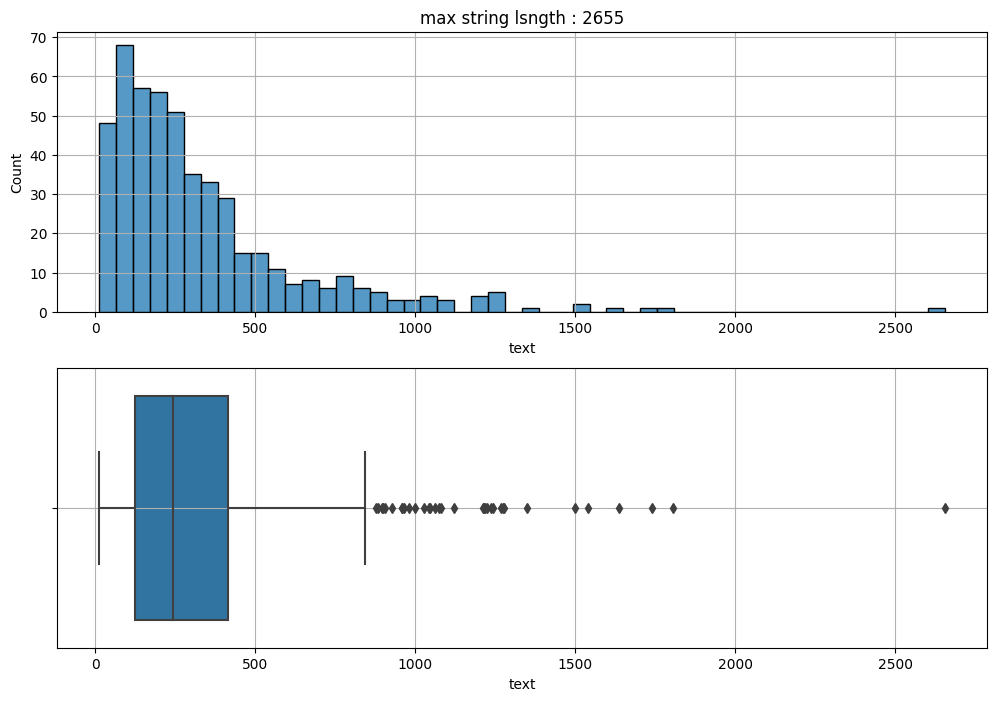

------------------------------------------------------------------------------------------------------------------------


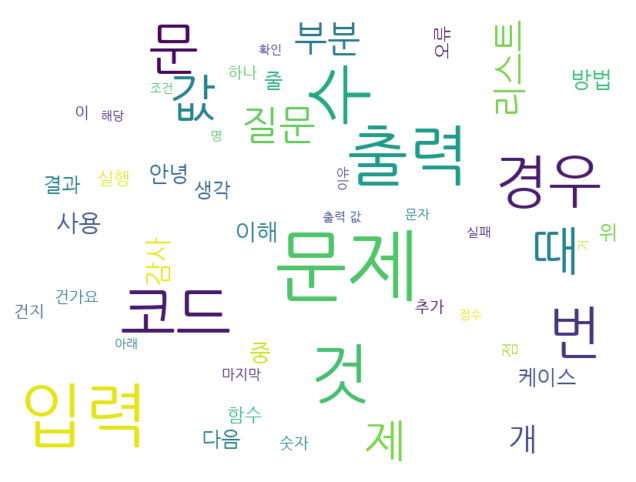

************************************************************************************************************************


'유형: 코드2'

0    self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
1    glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
2    tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
3    filename = TEST_IMAGE + str(round(frame_sec)) ...
4    만약\n각각 결측치가 하나씩 있는 경우를 제외하고\nOzone  열에도 Solar....
5    궁금한 사항은 다음과 같습니다.\n1) data에 있는 연속형 변수 A,B가 존재한...
6    model.predict() 에서 \n'float' object cannot be ...
7    x_train = scaler.fit_transform(x_train) \nx_va...
8    train_x,train_y= train_test_split(df_total,tes...
9    모델 학습 시 아래와 같은 error 메세지가 나와서 어떻게 해결해야 할지 문의 드...
Name: text, dtype: object

count                                                  1097
unique                                                 1097
top       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,1097.0,261.750228,398.162267,13.0,90.0,158.0,285.0,6012.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs

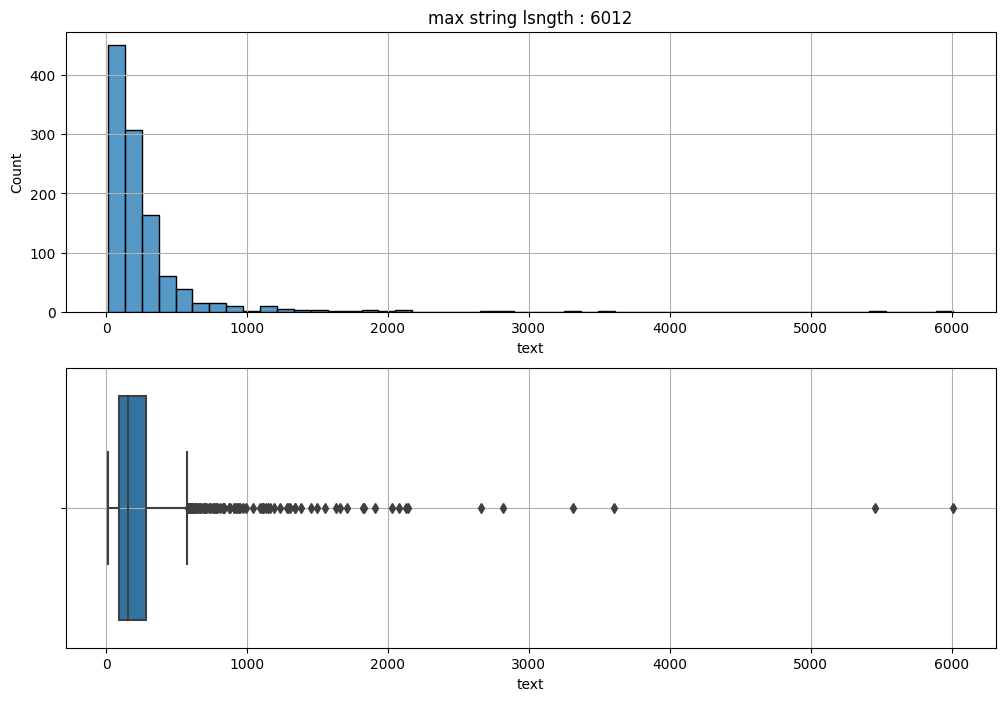

------------------------------------------------------------------------------------------------------------------------


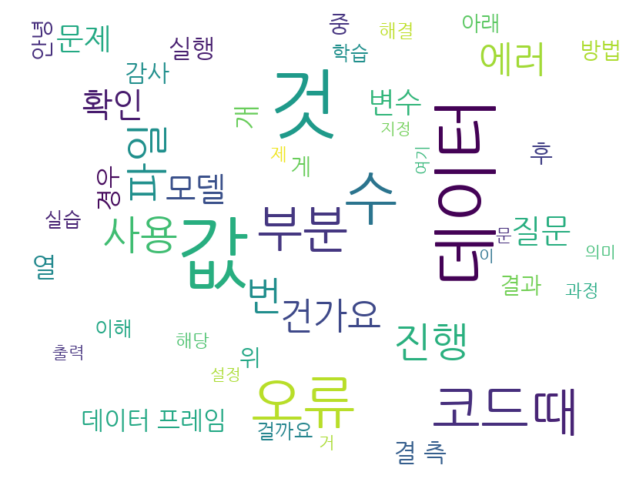

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [14]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
preprocessed_df = train_df.replace({'label' : label_dict}).copy()

************************************************************************************************************************


0    1585
1     732
2     728
3     561
4     100
Name: label, dtype: int64

0    0.427685
1    0.197518
2    0.196438
3    0.151376
4    0.026983
Name: label, dtype: float64

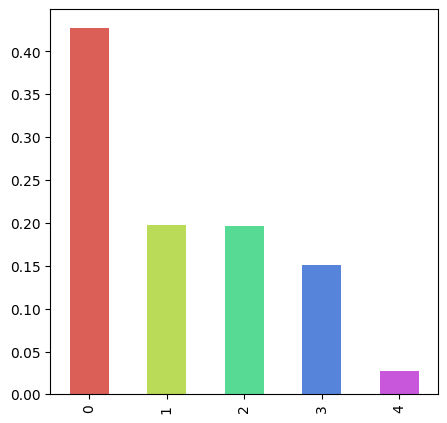

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.0+ KB


count                                                  3706
unique                                                 3706
top       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,3706.0,200.957366,330.558868,9.0,68.0,118.0,222.0,6012.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs

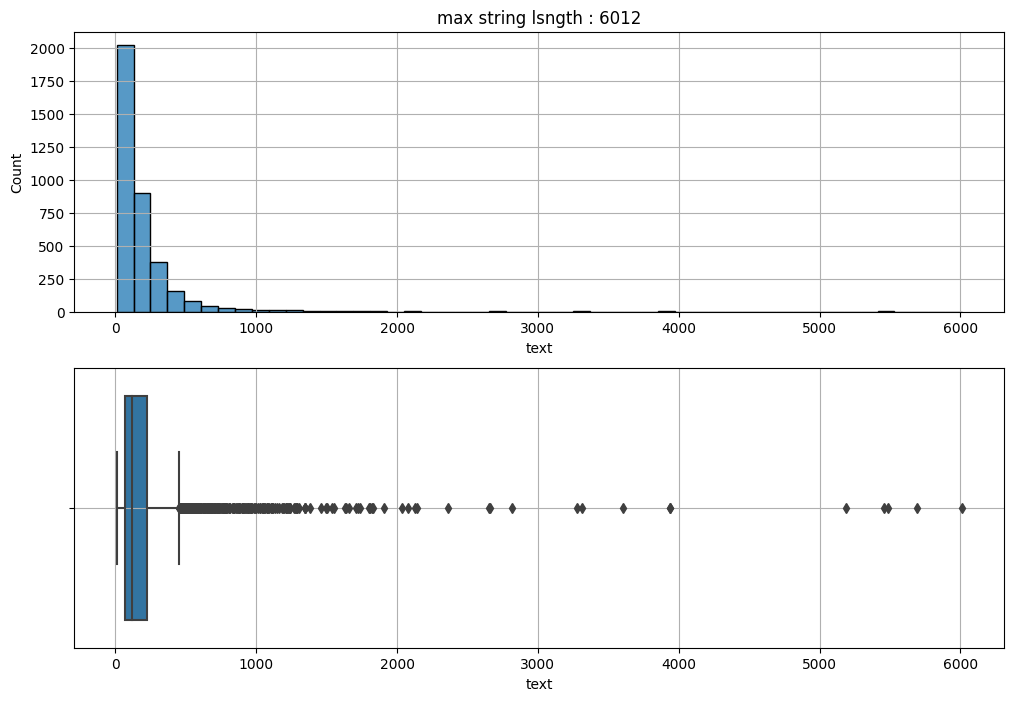

------------------------------------------------------------------------------------------------------------------------


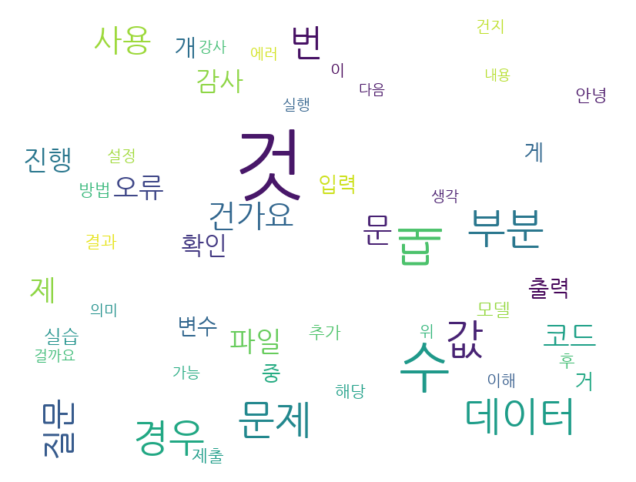

In [ ]:
text_analysis(preprocessed_df)

### 5-2. Train Validation split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(preprocessed_df.text, preprocessed_df.label, test_size=0.2, random_state=2023)

In [ ]:
x_train

1107    안녕하세요. :)\n금일 수업 자료 중 [1.2 데이터 불러오기 및 분석(EDA)_...
947     'Kernel Panic - not syncing: Attempted to kill...
1225    답변을 받고 여러번 시도해 보았는데 모든 서브넷 설정이 사진과 같은 상태입니다.\n...
1754    요소가 하나인 튜플을 생성할 때, \nex) score = 90, \n이렇게 한다고...
704     Q2. 코딩을 작성할 때 첨부 사진처럼 while문을 사용해서 네모칸을 만든 후 주...
                              ...                        
1953                                    참고할 교안사항이 있을까요 ㅠ?
2743    아래 사진처럼 python manage.py makemigrations 하는데 아래...
2502    2)그리고, 보통은 웹서버를 퍼블릭 ip에 만들지만 이 경우에만 프라이빗 ip에 만...
1561                이런 그래프 라벨 보다 촘촘하게 볼 수 있는 방법은 없을까요...?
855     오늘 실습 제일 마지막에 scrapy crawl GMB -o items.csv 명령...
Name: text, Length: 2964, dtype: object

In [ ]:
x_test = pd.read_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/train.csv")['text']
y_test = pd.read_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/train.csv")['label']

In [ ]:
y_test

0          코드2
1            웹
2          코드2
3          코드2
4          코드2
         ...  
3701       코드2
3702    시스템 운영
3703        이론
3704        원격
3705        이론
Name: label, Length: 3706, dtype: object

In [ ]:
x_test

0       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
1       현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
2       glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
3       tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
4       filename = TEST_IMAGE + str(round(frame_sec)) ...
                              ...                        
3701    토큰화 이후 train val 를 분리하고 각 train set, val set에 ...
3702    올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...
3703    수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...
3704    inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...
3705    상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...
Name: text, Length: 3706, dtype: object

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [ ]:
korean_stopwords_path = "/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/txt.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf-8') as f:
	stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

In [ ]:
# 불용어 데이터를 제거합니다.
X_train=[]
for sentence in preprocessed_df['text']:
    temp_X = []
    temp_X=mecab.nouns(sentence) # 토큰화
    temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
print(X_train[:4])

[['커널', '사이즈', '은', '단어', '최대', '길이', '가정', '선언'], ['이미지', '개', '업로드', '자바', '스크립트', '동적', '폼', '개', '생성', '데', '클릭', '뭘', '수', '기본', '예제', '코드', '이유', '뭘까요'], ['사용', '질문', '포함', '작동', '질문', '제공', '파일', '폴더', '포함', '폴더', '안', '정상', '작동'], ['오류', '해결']]


In [90]:
import re
import string
removal_list = "‘’◇‘”’'·\“·△●■()\">>`/-∼=ㆍ<>.?!【】…◆ .. ㅜㅜ ㅠㅠㅠㅠ%"
removal_list += string.punctuation
def clean_special(sentence: str = None) -> str:
    sentence = re.sub('[^0-9a-zA-Zㄱ-ㅣ가-힣]', ' ', sentence)
    sentence = re.sub("/s+", " ", sentence)

    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()
    return sentence

In [93]:
for idx in range(len(preprocessed_df)):
    preprocessed_df['text'][idx] = clean_special(preprocessed_df['text'][idx]) # 정규 표현식 수행
    # y_test['text'][idx] = clean_special(y_test['text'][idx]) # 정규 표현식 수행
    # preprocessed_df['text'][idx]=mecab.nouns(preprocessed_df['text'][idx]) # 토큰화
# X_test=[]
# for sentence in preprocessed_df['text']:
#     temp_X = []
#     temp_X=mecab.morphs(sentence) # 토큰화
#     temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거
#     X_test.append(temp_X)
# preprocessed_df['noun'] = X_test

<ipython-input-93-88677d20e0fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['text'][idx] = clean_special(y_test['text'][idx]) # 정규 표현식 수행


In [94]:
y_test

,id,text,clear_text
0,0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이...,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이...
1,1,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향...,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향...
2,2,a int input 정수 A의 값을 입력하시오 b int input...,a int input 정수 A의 값을 입력하시오 \nb int inpu...
3,3,def max4 a b c d maximum a if b gt...,def max4 a b c d \n maximum a\n if b&...
4,4,i 2 가 i 2 와 왜 같은지가 이해가 잘 안됩니다,i 2 가 i 2 와 왜 같은지가 이해가 잘 안됩니다
...,...,...,...
924,924,aice특강 ppt는 따로 안올려주시나요,aice특강 ppt는 따로 안올려주시나요
925,925,안녕하세요 실습 중 궁금한 점이 있어 문의 드립니다 1 라벨 인코더 라벨...,안녕하세요 \n실습 중 궁금한 점이 있어 문의 드립니다 \n\n1 라벨 인코더...
926,926,안녕하세요 kT AIDU에서 전에 Associate 시험에 대해 공부할 수 있는 ...,안녕하세요 \nkT AIDU에서 전에 Associate 시험에 대해 공부할 수 있는...
927,927,app 마다 urls py 을 만들어서 관리하는게 더 좋은 코드인가요 아니면 se...,app 마다 urls py 을 만들어서 관리하는게 더 좋은 코드인가요 \n아니면 s...


In [ ]:
for idx in range(len(preprocessed_df)):
    preprocessed_df['text'][idx] = ' '.join(preprocessed_df['text'][idx])


<ipython-input-63-6b51cdddcab8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['text'][idx] = ' '.join(preprocessed_df['text'][idx])


In [18]:
preprocessed_df

,text,label
0,self convs1 nn ModuleList nn Conv2d 1 Co ...,0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob glob PATH 를 사용할 때 질문입니다 PATH에 가 포함...,0
3,tmpp tmp groupby by Addr1 as index Fals...,0
4,filename TEST IMAGE str round frame sec ...,0
...,...,...
3701,토큰화 이후 train val 를 분리하고 각 train set val set에 ...,0
3702,올린 값들 중 최고점인 건가요 아니면 최근에 올린 파일로 무조건 갱신인가요 최고...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1 IT 인프라 ...,2
3704,inplace True 해도 값이 변경이 안되고 none으로 뜹니다 혹시 원격지...,4


In [ ]:
preprocessed_df.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/preprocessed_df.csv")


In [ ]:
X_tr=[]
for idx in preprocessed_df['text']:
    print(f"{idx}")
    print(f"전처리 전:  {idx}")
    print(f"전처리 후:  {clean_special(idx)}")
    X_tr.append(clean_special(idx))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
전처리 후:  본 플젝에서는 총 4개의 클래스가 등장하는데제가 fscore를 확인한 결과 array  0 565495210 5661150 531598510   가 나왔습니다validation generator classes를 확인한 결과validation에서 3개의 클래스 파일만 사용했더라구요이걸 어떻게 고칠 수 있을까요     validation 분할은 train datagen ImageDataGeneratorrescale 1255validation split 0 2하였습니다
 어제 실습 내용을 변경하게 되어서 같이 제출합니다 문화체육관광부을 고객사로 지정하게 되었는데 기업과 같이 수익을 우선 시 하는 단체가  아니라서 그런지 실습 내용을 작성하는데 어려움이 있었습니다 
전처리 전:   어제 실습 내용을 변경하게 되어서 같이 제출합니다 문화체육관광부을 고객사로 지정하게 되었는데 기업과 같이 수익을 우선 시 하는 단체가  아니라서 그런지 실습 내용을 작성하는데 어려움이 있었습니다 
전처리 후:  어제 실습 내용을 변경하게 되어서 같이 제출합니다 문화체육관광부을 고객사로 지정하게 되었는데 기업과 같이 수익을 우선 시 하는 단체가  아니라서 그런지 실습 내용을 작성하는데 어려움이 있었습니다
epochsepochs batch_size batch_size 이렇게 선언을 하면 디폴트값으로 선언이 된다는건가요몇개로 나눌지를 숫자로 입력하는게 아닌가요?
전처리 전:  epochsepochs batch_size batch_size 이렇게 선언을 하면 디폴트값으로 선언이 된다는건가요몇개로 나눌지를 숫자로 입력하는게 아닌가요?
전처리 후:  epochsepochs batch size batch size 이렇게 선언을 하면 디폴트값으로 선언이 된다는건가요몇개로 나눌지를 숫자로 입력하는게 아닌가요
아까 1분전에 다 풀고 제출했는데 11분 되자마자 제가 풀었던 답안 확인하려고 들어갔는데  셀프테스트 문제에 아무런 답안 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



전처리 후:  안녕하세요   실습 2 정보유출실습 진행 관련 문의드립니다   새 터미널을 실행 후 exf ps파일을 업로드 후 리버스 커넥션 쉘을 통해 실행하고자 합니다   새 터미널 실행시root kali   으로 시작하는데 meterpreter gt명령창으로 넘어가는 방법이 궁금합니다   감사합니다
model.fit 하는 과정에서  InvalidArgumentError indices[0,16is not in [01) [[node sequential/embedding/embedding_lookup (defined at :1][Op:__inference_train_function_1887]  Errors may have originated from an input operation. Input Source operations connected to node sequential/embedding/embedding_lookup:sequential/embedding/embedding_lookup/156(defined at /usr/lib/python3.6/contextlib.py:81)  Function call stack: train_function  위와 같은 오류가 뜹니다어느 부분이 잘못되어서 저런 오류가 뜨나요?
전처리 전:  model.fit 하는 과정에서  InvalidArgumentError indices[0,16is not in [01) [[node sequential/embedding/embedding_lookup (defined at :1][Op:__inference_train_function_1887]  Errors may have originated from an input operation. Input Source operations connected to node sequential/embedding/embedding_lookup:sequential/embedding/embedding_lookup/156(defined at /usr/lib/

In [ ]:
X_te=[]
for idx in preprocessed_df['text']:
    X_te.append(clean_special(idx))
    

In [ ]:
preprocessed_df

,text,label
0,self convs1 nn ModuleList nn Conv2d 1 Co ...,0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob glob PATH 를 사용할 때 질문입니다 PATH에 가 포함...,0
3,tmpp tmp groupby by Addr1 as index Fals...,0
4,filename TEST IMAGE str round frame sec ...,0
...,...,...
3701,토큰화 이후 train val 를 분리하고 각 train set val set에 ...,0
3702,올린 값들 중 최고점인 건가요 아니면 최근에 올린 파일로 무조건 갱신인가요 최고...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1 IT 인프라 ...,2
3704,inplace True 해도 값이 변경이 안되고 none으로 뜹니다 혹시 원격지...,4


In [ ]:
X_tr = np.array(X_tr)
X_te = np.array(X_te)

In [151]:
x_train, x_val, y_train, y_val = train_test_split(preprocessed_df.text, preprocessed_df.label, test_size=0.2, random_state=2023)

In [ ]:
X_tr = pd.DataFrame(X_tr)
X_te = pd.DataFrame(X_te)

In [ ]:
x_train.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/x_train.csv")
x_val.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/x_val.csv")
x_test.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/x_test.csv")
y_train.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/y_train.csv")
y_val.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/y_val.csv")
y_test.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/y_test.csv")
X_tr.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/train_set.csv")
X_te.to_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/test_set.csv")

In [ ]:
X_tr

,0
0,self convsnn ModuleList nn Conv2d 1Co K100 fo...
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
2,glob glob PATH를 사용할 때 질문입니다 PATH에 가 포함되면 제대로...
3,tmpp tmp groupby by Addr1 as index False C...
4,filename TEST IMAGE str round frame sec jpg ...
...,...
3701,토큰화 이후 train val 를 분리하고 각 train setval set에 벡터...
3702,올린 값들 중 최고점인 건가요아니면 최근에 올린 파일로 무조건 갱신인가요 최고점보...
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1IT 인프라 구조...
3704,inplace True 해도 값이 변경이 안되고 none으로 뜹니다혹시 원격지원 ...


In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2964,), (742,), (2964,), (742,))

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [ ]:
count_vectorizer = CountVectorizer()
count_mecab_vectorizer = CountVectorizer(tokenizer=mecab_tokenizer)

NameError: ignored

In [ ]:
x_train_counts = count_vectorizer.fit_transform(x_train)
x_val_counts = count_vectorizer.fit_transform(x_val)
x_test_counts = count_vectorizer.fit_transform(x_test)

In [ ]:
x_train_mecab_counts = count_mecab_vectorizer.fit_transform(x_train)
x_val_mecab_counts = count_mecab_vectorizer.fit_transform(x_val)
x_test_mecab_counts = count_mecab_vectorizer.fit_transform(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
transformer = TfidfTransformer()
x_train_tfidf = transformer.fit_transform(x_train_mecab_counts)
x_val_tfidf = transformer.fit_transform(x_val_mecab_counts)
x_test_tfidf = transformer.fit_transform(x_test_mecab_counts)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidfv = tfidf_vectorizer.fit_transform(x_train)
x_val_tfidfv = tfidf_vectorizer.fit_transform(x_val)
x_test_tfidfv = tfidf_vectorizer.fit_transform(x_test)

In [ ]:
print("Count Vectorizer Vocabulary size: ", len(count_vectorizer.vocabulary_))
print("Count Vectorizer(mecab tokenizer) Vocabulary size: ", len(count_mecab_vectorizer.vocabulary_))
print("TF-IDF Vectorizer(mecab tokenizer) Vocabulary size: ", len(tfidf_vectorizer.vocabulary_))

Count Vectorizer Vocabulary size:  28377
Count Vectorizer(mecab tokenizer) Vocabulary size:  11261
TF-IDF Vectorizer(mecab tokenizer) Vocabulary size:  28377


### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [156]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import text
TOP_K = 5000
MAX_SEQUENCE_LENGTH = 500
x_mor_train_str = x_train.apply(lambda x:' '.join(mecab_tokenizer(x)))
x_mor_val_str = x_val.apply(lambda x:' '.join(mecab_tokenizer(x)))
# x_mor_test_str = x_test.apply(lambda x:' '.join(mecab_tokenizer(x)))
x_mor_train = x_train.apply(lambda x:mecab_tokenizer(x))
x_mor_val= x_val.apply(lambda x:mecab_tokenizer(x))
# x_mor_test = x_test.apply(lambda x:mecab_tokenizer(x))

In [153]:
x_mor_train_str

1107    안녕/NNG 하/XSV 세요/EP+EF 금일/NNG 수업/NNG 자료/NNG 중/N...
947     Kernel/SL Panic/SL not/SL syncing/SL Attempted...
1225    답변/NNG 을/JKO 받/VV 고/EC 여러/MM 번/NNBC 시도/NNG 해/X...
1754    요소/NNG 가/JKS 하나/NR 인/VCP+ETM 튜플/NNP 을/JKO 생성/N...
704     Q/SL 2/SN 코딩/NNG 을/JKO 작성/NNG 할/XSV+ETM 때/NNG ...
                              ...                        
1953     참고/NNG 할/XSV+ETM 교안/NNG 사항/NNG 이/JKS 있/VV 을까요/EC
2743    아래/NNG 사진/NNG 처럼/JKB python/SL manage/SL py/SL...
2502    2/SN 그리고/MAJ 보통/NNG 은/JX 웹/NNG 서버/NNG 를/JKO 퍼블...
1561    이런/MM 그래프/NNG 라벨/NNG 보다/MAG 촘촘/XR 하/XSA 게/EC 볼...
855     오늘/MAG 실습/NNG 제일/NNG 마지막/NNG 에/JKB scrapy/SL c...
Name: text, Length: 2964, dtype: object

In [ ]:
x_mor_train

1107    [안녕/NNG, 하/XSV, 세요/EP+EF, ./SF, :/SC, )/SSC, 금...
947     ['/SY, Kernel/SL, Panic/SL, -/SY, not/SL, sync...
1225    [답변/NNG, 을/JKO, 받/VV, 고/EC, 여러/MM, 번/NNBC, 시도/...
1754    [요소/NNG, 가/JKS, 하나/NR, 인/VCP+ETM, 튜플/NNP, 을/JK...
704     [Q/SL, 2/SN, ./SF, 코딩/NNG, 을/JKO, 작성/NNG, 할/XS...
                              ...                        
1953    [참고/NNG, 할/XSV+ETM, 교안/NNG, 사항/NNG, 이/JKS, 있/V...
2743    [아래/NNG, 사진/NNG, 처럼/JKB, python/SL, manage/SL,...
2502    [2/SN, )/SSC, 그리고/MAJ, ,/SC, 보통/NNG, 은/JX, 웹/N...
1561    [이런/MM, 그래프/NNG, 라벨/NNG, 보다/MAG, 촘촘/XR, 하/XSA,...
855     [오늘/MAG, 실습/NNG, 제일/NNG, 마지막/NNG, 에/JKB, scrap...
Name: text, Length: 2964, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,2964.0,59.846829,61.693713,3.0,26.0,43.0,72.25,929.0


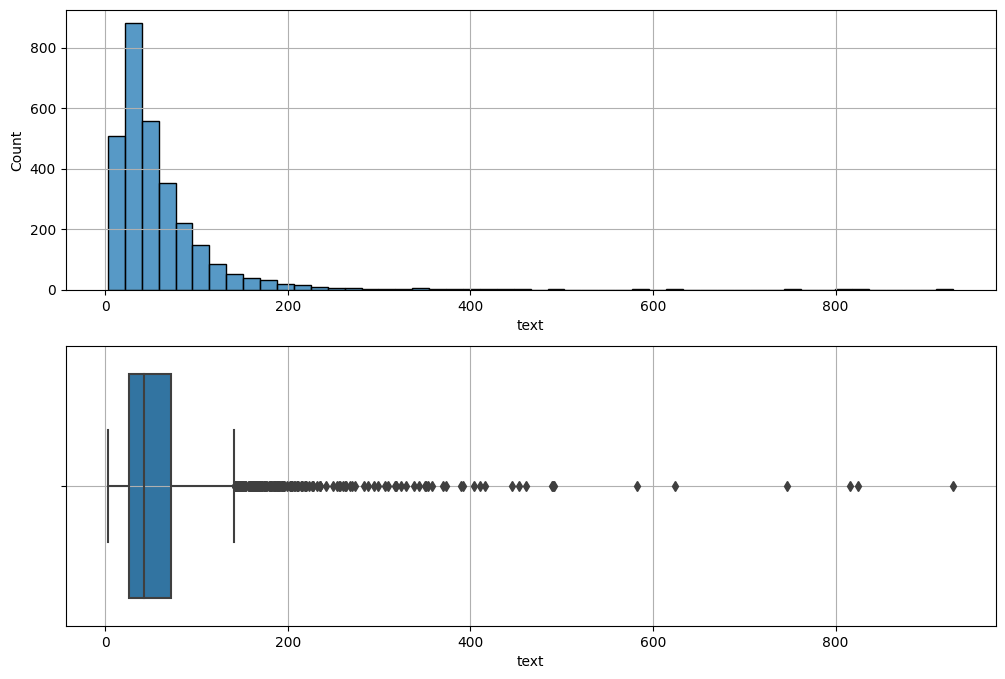

In [157]:
train_world_counts = x_mor_train.apply(lambda x:len(x))
display(pd.DataFrame(train_world_counts).describe().T)
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(train_world_counts, bins=50)
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(x=train_world_counts)
plt.grid()
plt.show()

In [158]:
tokenizer_str= text.Tokenizer(num_words=TOP_K, char_level=False)
tokenizer_str.fit_on_texts(x_mor_train_str)
x_mor_train_seq_str = tokenizer_str.texts_to_sequences(x_mor_train_str)
x_mor_val_seq_str = tokenizer_str.texts_to_sequences(x_mor_val_str)
# x_mor_test_seq_str = tokenizer_str.texts_to_sequences(x_mor_test_str)

max_length = len(max(x_mor_train_seq_str, key=len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
x_mor_train_seq_str = sequence.pad_sequences(x_mor_train_seq_str, maxlen=max_length)
x_mor_val_seq_str = sequence.pad_sequences(x_mor_val_seq_str, maxlen=max_length)
# x_mor_test_seq_str = sequence.pad_sequences(x_mor_test_seq_str, maxlen=max_length)

500


In [159]:
tokenizer = text.Tokenizer(num_words=TOP_K, char_level=False)
tokenizer.fit_on_texts(x_mor_train)
x_mor_train_seq = tokenizer.texts_to_sequences(x_mor_train)
x_mor_val_seq = tokenizer.texts_to_sequences(x_mor_val)
# x_mor_test_seq = tokenizer.texts_to_sequences(x_mor_test)

max_length = len(max(x_mor_train_seq, key=len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
x_mor_train_seq = sequence.pad_sequences(x_mor_train_seq, maxlen=max_length)
x_mor_val_seq = sequence.pad_sequences(x_mor_val_seq, maxlen=max_length)
# x_mor_test_seq = sequence.pad_sequences(x_mor_test_seq, maxlen=max_length)

500


In [ ]:
x_mor_train_seq

array([[   0,    0,    0, ...,  939, 2612,  317],
       [   0,    0,    0, ...,  185,  771,  200],
       [   0,    0,    0, ...,   88,   59,   12],
       ...,
       [   0,    0,    0, ...,  501,   66,   96],
       [   0,    0,    0, ...,   33,   75,   65],
       [   0,    0,    0, ...,   29,   21,   65]], dtype=int32)

In [ ]:
x_mor_train_seq_str.shape, x_mor_val_seq_str.shape, x_mor_test_seq_str.shape

((2964, 500), (742, 500), (3706, 500))

In [ ]:
x_mor_train_seq.shape, x_mor_val_seq.shape, x_mor_test_seq.shape

((2964, 500), (742, 500), (3706, 500))

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
len(tokenizer.word_index) + 1

10248

In [ ]:
tokenizer_str.texts_to_sequences(x_mor_train_str[2622])

[[102],
 [],
 [],
 [116],
 [116],
 [449],
 [],
 [31],
 [],
 [214],
 [232],
 [93],
 [],
 [35],
 [],
 [427],
 [427],
 [],
 [221],
 [],
 [334],
 [333],
 [240],
 [],
 [1838],
 [203],
 [],
 [116],
 [116],
 [449],
 [],
 [26],
 [],
 [214],
 [232],
 [780],
 [],
 [4379],
 [125],
 [],
 [116],
 [116],
 [449],
 [],
 [77],
 [193],
 [],
 [59],
 [164],
 [427],
 [],
 [334],
 [133],
 [],
 [],
 [70],
 [4549],
 [],
 [116],
 [116],
 [233],
 [],
 [32],
 [48],
 [],
 [164],
 [116],
 [],
 [],
 [],
 [164],
 [212],
 [],
 [780],
 [427],
 [55],
 [],
 [164],
 [529],
 [],
 [27],
 [3144],
 [533],
 [],
 [427],
 [427],
 [],
 [102],
 [],
 [334],
 [333],
 [116],
 [],
 [27],
 [],
 [214],
 [232],
 [164],
 [],
 [73],
 [],
 [240],
 [55],
 [449],
 [],
 [44],
 [],
 [427],
 [427],
 [],
 [22],
 [304],
 [],
 [334],
 [133],
 [],
 [4505],
 [122],
 [],
 [240],
 [55],
 [449],
 [],
 [175],
 [122],
 [],
 [240],
 [55],
 [449],
 [],
 [1838],
 [203],
 [],
 [116],
 [116],
 [449],
 [],
 [1616],
 [50],
 [],
 [240],
 [55],
 [449],
 [],
 [76]

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
import gdown
url = 'https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view'
PATH = '/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료'
output = os.path.join(PATH, 'ko.zip')
gdown.download(url, output, fuzzy=True, quiet=False)
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/ko.zip", "r") as zip_ref:
    zip_ref.extractall(PATH)

Downloading...
From: https://drive.google.com/uc?id=0B0ZXk88koS2KbDhXdWg1Q2RydlU
To: /content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/ko.zip
100%|██████████| 80.6M/80.6M [00:00<00:00, 250MB/s]


In [ ]:
from gensim.models import Word2Vec, FastText, KeyedVectors
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
SIZE = 128
WINDOW = 3
MIN_COUNT = 1
w2v_model = Word2Vec(sentences=x_mor_train,
                    #  size=SIZE,
                     max_vocab_size=None,
                     min_count=MIN_COUNT,
                     workers=4,
                    #  iter=10,
                     negative=5,
                     sg=0)

NameError: ignored

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [ ]:
pre_trained = Word2Vec.load("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/ko.bin")

ERROR:gensim.models.word2vec:Model load error. Was model saved using code from an older Gensim Version? Try loading older model using gensim-3.8.3, then re-saving, to restore compatibility with current code.


AttributeError: ignored

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [ ]:
import numpy as np
import scipy.sparse
x_train_tfidf.shape, x_val_tfidf.shape, x_test_tfidf.shape

scipy.sparse.save_npz("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/x_tfidf_train", x_train_tfidf)
scipy.sparse.save_npz("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/x_tfidf_val", x_val_tfidf)
scipy.sparse.save_npz("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/x_tfidf_test", x_test_tfidf)

NameError: ignored

In [ ]:
import numpy as np

np.save("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료", arr = x_mor_train_seq)
np.save("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료", arr = x_mor_val_seq)
np.save("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료", arr = x_mor_test_seq)

In [ ]:
np.save("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/y_train", arr = y_train)
np.save("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/y_val", arr = y_val)

In [ ]:
x_train_tfidf.shape, x_val_tfidf.shape, x_test_tfidf.shape

((2964, 10247), (742, 5179), (3706, 11261))

In [ ]:
x_mor_train_seq.shape, x_mor_val_seq.shape, x_mor_test_seq.shape

((2964, 500), (742, 500), (3706, 500))

In [ ]:
y_train.shape, y_val.shape

((2964,), (742,))

In [ ]:
x_train_tfidf[20]

<1x10247 sparse matrix of type '<class 'numpy.float64'>'
	with 87 stored elements in Compressed Sparse Row format>

In [ ]:
x_train

1107    안녕하세요:)\n금일 수업 자료 중 [1.2 데이터 불러오기 및 분석(EDA)_2차...
947     'Kernel Panic not syncingAttempted to kill ini...
1225    답변을 받고 여러번 시도해 보았는데 모든 서브넷 설정이 사진과 같은 상태입니다.\n...
1754    요소가 하나인 튜플을 생성할 때\nexscore 90\n이렇게 한다고 배웠는데\nt...
704     Q2코딩을 작성할 때 첨부 사진처럼 while문을 사용해서 네모칸을 만든 후 주소를...
                              ...                        
1953                                    참고할 교안사항이 있을까요 ㅠ?
2743    아래 사진처럼 python manage.py makemigrations 하는데 아래...
2502    2)그리고보통은 웹서버를 퍼블릭 ip에 만들지만 이 경우에만 프라이빗 ip에 만든다...
1561                이런 그래프 라벨 보다 촘촘하게 볼 수 있는 방법은 없을까요...?
855     오늘 실습 제일 마지막에 scrapy crawl GMB -o items.csv 명령...
Name: text, Length: 2964, dtype: object

In [ ]:
preprocessed_df

,text,label
0,self convs1 nn ModuleList nn Conv2d 1 Co ...,0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob glob PATH 를 사용할 때 질문입니다 PATH에 가 포함...,0
3,tmpp tmp groupby by Addr1 as index Fals...,0
4,filename TEST IMAGE str round frame sec ...,0
...,...,...
3701,토큰화 이후 train val 를 분리하고 각 train set val set에 ...,0
3702,올린 값들 중 최고점인 건가요 아니면 최근에 올린 파일로 무조건 갱신인가요 최고...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1 IT 인프라 ...,2
3704,inplace True 해도 값이 변경이 안되고 none으로 뜹니다 혹시 원격지...,4


In [160]:
# 로지스틱
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression()

In [161]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=4,
                   verbose=1,
                   restore_best_weights=True)

model.fit(x_mor_train_seq, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
y_pred = model.predict(x_mor_val_seq)
# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: ignored

# **koBERT**

In [ ]:
data = []
for noun, label in zip(preprocessed_df['text'], preprocessed_df['label']):
    preprocessed_df = []
    preprocessed_df.append(noun)
    preprocessed_df.append(str(label))

    data.append(preprocessed_df)

In [ ]:
data

[['여기 커널 사이즈 은 단어 최대 길이 가정 선언 것', '0'],
 ['이미지 개 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 이유 뭘까요', '1'],
 ['사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동', '0'],
 ['오류 해결', '0'],
 ['안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질문', '0'],
 ['저 헬스 중 정신 건강 관심 디지털 치료제 관련 서비스 기획 기업 프로젝트 희망 보건복지부 정신 건강 관련 포털 운영 이 중심 문제 정의',
  '2'],
 ['파일 페이지 제 안사 인프라 구성 웹 서버 솔루션 대 통합 제시 때 배치도 작성 이중화 표현 작성 대로 통합 배치 걸까요', '1'],
 ['범주 데이터 숫자 데이터 설명 내용 적응 아래 첨부 파일 실습 데이터 서울시 릉 시간 비 데이터 저 데이터 범주 데이터 생각 제 의도 값 시간 대별 비 과 방법 사용 출력 의도 대로 질문 변량 분석 변량 분석 아래 가설 검증 방향 접근 방법 비 비 생각',
  '2'],
 ['첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 큰따옴표 따옴표 백 슬래시 데이터베이스 전달 위험 걸 리 문장 를 으로 문자열 출력 프로그램 작성 제 생각 문제 요구 사항 다음 입력 문장 따옴표 따옴표 백 슬래시 요구 대로 입력 시 추가 수정 생각 조건 형태 인 경우 수정 문제 것',
  '0'],
 ['오타 확인 오타 해당 파일 확인 저 문제 걸까요 동일 이미지 마크 해당 이미지 파일', '1'],
 ['결 측 하나 경우 제외 열 열 결 측 행 제거 경우 하나 결 측 하나 경우 제외 결 측 중복 열 제거 방법', '0'],
 ['윈도우 프롬프트 작업 중 이후 퍼블릭 연결 결과 도출', '1'],
 ['달 번 지원금 국민 카드 입금', '3'],
 ['사항 다음 연속 변수 존재 때 값 변수 상관 계수 값 값 데이터 평균 값 하나 대치 집계 상관 계수 상관 

In [ ]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test  = train_test_split(data, test_size=0.2, random_state=2023)

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-3.0.2-py3-none-any.whl (769 kB)
  Using cached tokenizers-0.8.1rc1.tar.gz (97 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for

In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

##GPU 사용 시
device = torch.device("cuda:0")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-l9xhh30f
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-l9xhh30f
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done


In [ ]:
#bert 모델, vocab 불러오기
bertmodel, vocab = get_pytorch_kobert_model()


using cached model. /content/.cache/kobert_v1.zip
using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
## Setting parameters
max_len = 64
batch_size = 32
warmup_ratio = 0.1
num_epochs = 30
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)
#BERTDataset 클래스 이용, TensorDataset으로 만들어주기
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
#배치 및 데이터로더 설정
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=4)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5, ##주의: 클래스 수 바꾸어 주세요!##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device) #gpu


In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} validation acc {}".format(e+1, test_acc / (batch_id+1)))

<ipython-input-57-ee26ec442099>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.6932028532028198 train acc 0.15625
epoch 1 train acc 0.3315860215053763


<ipython-input-57-ee26ec442099>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 1 validation acc 0.4539930555555556


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.425950050354004 train acc 0.4375
epoch 2 train acc 0.5690188172043011


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 2 validation acc 0.6987847222222222


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.1345657110214233 train acc 0.625
epoch 3 train acc 0.7196236559139785


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 3 validation acc 0.7157118055555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.5894164443016052 train acc 0.875
epoch 4 train acc 0.7901209677419355


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 4 validation acc 0.7352430555555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.4540945887565613 train acc 0.8125
epoch 5 train acc 0.8512096774193548


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 5 validation acc 0.7287326388888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.2682962417602539 train acc 0.96875
epoch 6 train acc 0.8851478494623656


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 6 validation acc 0.7482638888888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.0983521044254303 train acc 1.0
epoch 7 train acc 0.9193548387096774


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 7 validation acc 0.7625868055555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.04083915054798126 train acc 1.0
epoch 8 train acc 0.9184811827956989


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 8 validation acc 0.7278645833333334


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.11261501908302307 train acc 1.0
epoch 9 train acc 0.9375


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 9 validation acc 0.7890625


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.035767972469329834 train acc 1.0
epoch 10 train acc 0.9559811827956989


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 10 validation acc 0.7708333333333334


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.01837931200861931 train acc 1.0
epoch 11 train acc 0.9606854838709677


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 11 validation acc 0.76953125


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.12938249111175537 train acc 0.96875
epoch 12 train acc 0.96875


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 12 validation acc 0.7625868055555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.09119632840156555 train acc 0.96875
epoch 13 train acc 0.9781586021505376


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 13 validation acc 0.7643229166666666


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.03724632039666176 train acc 0.96875
epoch 14 train acc 0.9811827956989247


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 14 validation acc 0.7508680555555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.004547577816992998 train acc 1.0
epoch 15 train acc 0.9825268817204301


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 15 validation acc 0.7786458333333334


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.06712248176336288 train acc 0.96875
epoch 16 train acc 0.9831989247311828


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 16 validation acc 0.7599826388888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.0043646604754030704 train acc 1.0
epoch 17 train acc 0.988239247311828


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 17 validation acc 0.7599826388888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.011804627254605293 train acc 1.0
epoch 18 train acc 0.9956317204301075


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 18 validation acc 0.7625868055555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.0037779677659273148 train acc 1.0
epoch 19 train acc 0.9936155913978495


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 19 validation acc 0.7664930555555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.00393188651651144 train acc 1.0
epoch 20 train acc 0.9952956989247311


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 20 validation acc 0.7717013888888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 21 batch id 1 loss 0.012239675037562847 train acc 1.0
epoch 21 train acc 0.9956317204301075


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 21 validation acc 0.7743055555555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 22 batch id 1 loss 0.005275151692330837 train acc 1.0
epoch 22 train acc 0.9959677419354839


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 22 validation acc 0.7638888888888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 23 batch id 1 loss 0.005267169326543808 train acc 1.0
epoch 23 train acc 0.9942876344086021


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 23 validation acc 0.7717013888888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 24 batch id 1 loss 0.012658442370593548 train acc 1.0
epoch 24 train acc 0.9959677419354839


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 24 validation acc 0.7743055555555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 25 batch id 1 loss 0.017249058932065964 train acc 1.0
epoch 25 train acc 0.9966397849462365


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 25 validation acc 0.7743055555555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 26 batch id 1 loss 0.009730830788612366 train acc 1.0
epoch 26 train acc 0.9963037634408602


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 26 validation acc 0.7730034722222222


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 27 batch id 1 loss 0.010215694084763527 train acc 1.0
epoch 27 train acc 0.9963037634408602


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 27 validation acc 0.7743055555555555


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 28 batch id 1 loss 0.006571530364453793 train acc 1.0
epoch 28 train acc 0.9969758064516129


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 28 validation acc 0.7756076388888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 29 batch id 1 loss 0.00773707265034318 train acc 1.0
epoch 29 train acc 0.9963037634408602


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 29 validation acc 0.7756076388888888


  0%|          | 0/93 [00:00<?, ?it/s]

epoch 30 batch id 1 loss 0.010958374477922916 train acc 1.0
epoch 30 train acc 0.9963037634408602


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 30 validation acc 0.7756076388888888


# TF-IDF + *로지스틱*

In [ ]:
preprocessed_df

,text,label
0,self convs1 nn ModuleList nn Conv2d 1 Co ...,0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob glob PATH 를 사용할 때 질문입니다 PATH에 가 포함...,0
3,tmpp tmp groupby by Addr1 as index Fals...,0
4,filename TEST IMAGE str round frame sec ...,0
...,...,...
3701,토큰화 이후 train val 를 분리하고 각 train set val set에 ...,0
3702,올린 값들 중 최고점인 건가요 아니면 최근에 올린 파일로 무조건 갱신인가요 최고...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1 IT 인프라 ...,2
3704,inplace True 해도 값이 변경이 안되고 none으로 뜹니다 혹시 원격지...,4


In [ ]:
reviews = list(preprocessed_df['text'])
sentiments = list(preprocessed_df['label'])

In [ ]:
# TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'char', sublinear_tf=True, 
    ngram_range = (1,3), max_features=5000)

X = vectorizer.fit_transform(reviews)

In [ ]:
print(vectorizer.vocabulary_)

{'s': 2337, 'e': 1463, 'l': 1832, 'f': 1606, ' ': 0, 'c': 1324, 'o': 2063, 'n': 1961, 'v': 2601, '1': 990, 'm': 1908, 'd': 1389, 'u': 2547, 'i': 1723, 't': 2435, '2': 1039, 'k': 1816, '0': 943, 'r': 2233, '여': 4120, '기': 2961, '서': 3810, '커': 4714, '사': 3761, '이': 4312, '즈': 4603, '은': 4254, '한': 4880, '단': 3158, '어': 4049, '의': 4299, '최': 4686, '대': 3168, '길': 2977, '가': 2711, '넘': 3031, '지': 4605, '않': 4011, '는': 3053, '다': 3120, '정': 4515, '으': 4247, '로': 3426, '그': 2935, '냥': 3026, '선': 3846, '언': 4077, '것': 2823, '인': 4390, '궁': 2926, '금': 2954, '합': 4903, '니': 3096, 'se': 2370, 'el': 1524, 'lf': 1871, 'f ': 1607, ' c': 85, 'co': 1362, 'on': 2102, 'nv': 2058, '1 ': 991, ' n': 174, 'nn': 2030, 'n ': 1962, ' m': 165, 'mo': 1946, 'od': 2078, 'du': 1455, 'ul': 2560, 'le': 1861, 'li': 1873, 'is': 1788, 'st': 2415, 't ': 2436, 'v2': 2604, '2d': 1074, 'd ': 1390, ' 1': 7, 'o ': 2064, ' k': 154, 'k ': 1817, '10': 1012, '00': 967, '0 ': 944, ' f': 120, 'fo': 1638, 'or': 2124, 'r ': 2234, '

In [ ]:
# 학습과 검증 데이터셋 분리
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 2023
TEST_SPLIT = 0.2

y = np.array(sentiments)

X_train, X_eval, y_train, y_eval = train_test_split(X,y,test_size=TEST_SPLIT, random_state = RANDOM_SEED)

In [ ]:
# 모델 선언 및 학습
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
X_testset = vectorizer.transform(preprocessed_df['text']).todense()

In [ ]:
print("Accuracy: %f".format(lgs.score(X_eval, y_eval)))

Accuracy: %f


In [ ]:
# est_data = pd.read_csv('test_clean.csv')

# testDataVecs = vectorizer.transform(test_data["review"])

# test_predicted = lgs.predict(testDataVecs)
# print(test_predicted)

# if not os.path.exists(DATA_OUT_PATH):
#   os.makedirs(DATA_OUT_PATH)

# ids = list(test_data['id'])
# answer_dataset = pd.DataFrame({'id' : ids, "sentiment" : test_predicted})
# answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

# W2V

In [ ]:
reviews = list(preprocessed_df['text'])
sentiments = list(preprocessed_df['label'])

sentences = []
for review in reviews:
    sentences.append(review.split())
 

In [ ]:
# 하이퍼 파라미터 설정
num_features = 300 # 워드 벡터 특징값 수
min_word_count = 40 # 단어에 대한 최소 빈도 수
num_workers = 4 # 프로세스 개수
context = 10 # 컨텍스트 윈도우 개수
downsampling = 1e-3 # 다운 샘플링 비율

In [ ]:
# 라이브러리 설치
! pip install gensim

# 로깅 준비
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(sentences,
    workers=num_workers,
    vector_size =num_features,
    min_count = min_word_count,
    window = context,
    sample = downsampling)

Training model...


In [ ]:
model_name = "300features_40minwords_10context"
model.save(model_name)

In [ ]:
pip install --upgrade gensim==4.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def get_features(words, model, num_features):
    # 출력 벡터 초기화
    feature_vector = np.zeros((num_features), dtype=np.float32)
    
    num_words = 0
    
    # 어휘사전 준비
    index2word_set = set(model.wv.index2word)
    
    for w in words:
        if w in index2word_set:
            num_words += 1
            #사전에 해당하는 단어에 대해 단어 벡터를 더함
            feature_vector = np.add(feature_vector, model[w])
            
    # 문장의 단어 수만큼 나누어 단어 벡터의 평균값을 문장 벡터로 함
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector
def get_dataset(reviews, model, num_features):
    dataset = list()
    
    for s in reviews:
        dataset.append(get_features(s, model, num_features))
        
    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs
test_data_vecs = get_dataset(sentences, model, num_features)

AttributeError: ignored

In [ ]:
print('Accuracy: %f' %lgs.score(X_eval, y_eval

In [ ]:
preprocessed_df

,text,label
0,self convs1 nn ModuleList nn Conv2d 1 Co ...,0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob glob PATH 를 사용할 때 질문입니다 PATH에 가 포함...,0
3,tmpp tmp groupby by Addr1 as index Fals...,0
4,filename TEST IMAGE str round frame sec ...,0
...,...,...
3701,토큰화 이후 train val 를 분리하고 각 train set val set에 ...,0
3702,올린 값들 중 최고점인 건가요 아니면 최근에 올린 파일로 무조건 갱신인가요 최고...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1 IT 인프라 ...,2
3704,inplace True 해도 값이 변경이 안되고 none으로 뜹니다 혹시 원격지...,4


In [ ]:
train_data = preprocessed_df[:2000]
test_data  = preprocessed_df[2000:]

In [ ]:
train_data.head()


,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [ ]:
test_data.head()


,text,label
2000,"수업 끝난 후 과제 제출을 위해 접속을 했는데, 계속 접속이 안됩니다.",3
2001,원격지원준비중이라고 하단에 뜹니다,4
2002,모델 학습시키니까 could not convert string to float: ...,0
2003,"model2.compile(optimizer = 'adam', loss ='mse'...",0
2004,1.1에서는 bus_station = pd.read_csv('1.1 BUS_STAT...,0


In [85]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [86]:
from tqdm import tqdm
import time
train_data_text = list(train_data['text'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(str(train_data_text[i]).replace('\\n', ''))
train_data['clear_text'] = train_clear_text
train_data.head()

IndexError: ignored

In [ ]:
import re
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  train_clear_text2.append(temp)
train_data['clear_text'] = train_clear_text2
train_data.head()

<ipython-input-19-5757f7de6c84>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['clear_text'] = train_clear_text2


,text,label,clear_text
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0,self convs1 nn ModuleList [nn Conv2d 1 Co ...
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0,glob glob PATH 를 사용할 때 질문입니다 \n\nPATH에 [ ] 가 ...
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0,tmpp tmp groupby by Addr1 as_index Fals...
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0,filename TEST_IMAGE str round frame_sec ...


In [ ]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test_data['clear_text'] = test_clear_text
test_data.head()

100%|██████████| 1706/1706 [00:00<00:00, 595298.06it/s]
<ipython-input-18-cd9db3c38609>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['clear_text'] = test_clear_text


,text,label,clear_text
2000,"수업 끝난 후 과제 제출을 위해 접속을 했는데, 계속 접속이 안됩니다.",3,"수업 끝난 후 과제 제출을 위해 접속을 했는데, 계속 접속이 안됩니다."
2001,원격지원준비중이라고 하단에 뜹니다,4,원격지원준비중이라고 하단에 뜹니다
2002,모델 학습시키니까 could not convert string to float: ...,0,모델 학습시키니까 could not convert string to float: ...
2003,"model2.compile(optimizer = 'adam', loss ='mse'...",0,"model2.compile(optimizer = 'adam', loss ='mse'..."
2004,1.1에서는 bus_station = pd.read_csv('1.1 BUS_STAT...,0,1.1에서는 bus_station = pd.read_csv('1.1 BUS_STAT...


In [87]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test_data['clear_text'] = test_clear_text2
test_data.head()

IndexError: ignored

In [98]:
test_data_text = list(y_test['text'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
y_test['text'][idx] = test_clear_text
# y_test['text'][idx] = clean_special(y_test['text'][idx])
y_test.head()

100%|██████████| 929/929 [00:00<00:00, 419159.68it/s]
<ipython-input-98-6f48ae577e6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['text'][idx] = test_clear_text


,id,text,clear_text
0,0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이...,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이...
1,1,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향...,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향...
2,2,a int input 정수 A의 값을 입력하시오 b int input...,a int input 정수 A의 값을 입력하시오 \nb int inpu...
3,3,def max4 a b c d maximum a if b gt...,def max4 a b c d \n maximum a\n if b&...
4,4,i 2 가 i 2 와 왜 같은지가 이해가 잘 안됩니다,i 2 가 i 2 와 왜 같은지가 이해가 잘 안됩니다


In [99]:
test_clear_text = list(y_test['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
y_test['text'][idx] = test_clear_text2
y_test.head()

<ipython-input-99-02ccf166d12f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['text'][idx] = test_clear_text2


,id,text,clear_text
0,0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이...,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이...
1,1,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향...,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향...
2,2,a int input 정수 A의 값을 입력하시오 b int input...,a int input 정수 A의 값을 입력하시오 \nb int inpu...
3,3,def max4 a b c d maximum a if b gt...,def max4 a b c d \n maximum a\n if b&...
4,4,i 2 가 i 2 와 왜 같은지가 이해가 잘 안됩니다,i 2 가 i 2 와 왜 같은지가 이해가 잘 안됩니다


In [103]:
# y_test.drop(labels='clear_text', axis=1)
# y_test = y_test['text']
y_test

0      팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요   이...
1      셀프테스트에서 받은 점수가 해당 교육을 이수하고  취업 연계등을 하는데 있어서 영향...
2      a  int input  정수 A의 값을 입력하시오      b  int input...
3      def max4 a b c d       maximum   a     if b gt...
4                    i   2 가  i    2 와 왜 같은지가 이해가 잘 안됩니다
                             ...                        
924                               aice특강 ppt는 따로 안올려주시나요
925    안녕하세요   실습 중 궁금한 점이 있어 문의 드립니다    1  라벨 인코더 라벨...
926    안녕하세요  kT AIDU에서 전에 Associate 시험에 대해 공부할 수 있는 ...
927    app 마다 urls py 을 만들어서 관리하는게 더 좋은 코드인가요  아니면 se...
928    [팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요   ...
Name: text, Length: 929, dtype: object

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 0 == \1 ]]
+ echo 'Install mecab-python'
Install mecab-python
+ install_mecab_python
+ pushd /tmp
/tmp /content
+ [[ ! -d mecab-python-0.996 ]]
+ popd
/content
+ [[ Linux == \D\a\r\w\i\n ]]
+ python3 -m pip install /tmp/mecab-

In [ ]:
X_train = []

text = list(train_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
#   temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 2000/2000 [00:01<00:00, 1038.30it/s]


In [ ]:
X_test = []

text = list(test_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
#   temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 1706/1706 [00:01<00:00, 1217.66it/s]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
tf.random.set_seed(777)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 11
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2351
등장 빈도가 10번 이하인 희귀 단어의 수: 1955
단어 집합에서 희귀 단어의 비율: 83.15610378562313
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 21.82726204465335


In [ ]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 397


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
token_X_train = tokenizer.texts_to_sequences(X_train)
token_X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = to_categorical(np.array(train_data['label']))


In [ ]:
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1]


In [ ]:
# 빈 샘플들을 제거
del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)
print(len(del_X_train))
print(len(del_y_train))

1964
1964


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


train data의 최대 길이 : 127
train data의 평균 길이 : 9.484215885947046


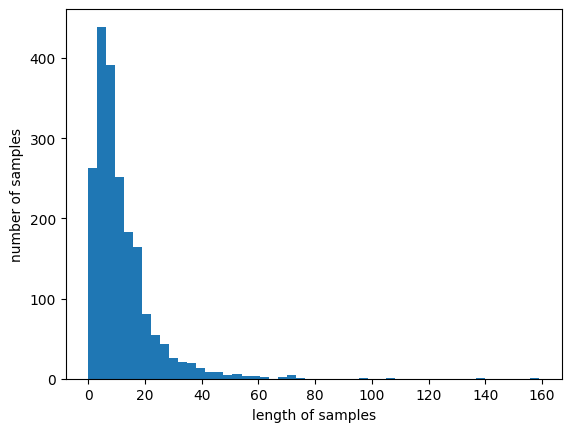

In [ ]:
print('train data의 최대 길이 :',max(len(l) for l in del_X_train))
print('train data의 평균 길이 :',sum(map(len, del_X_train))/len(del_X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

test data의 최대 길이 :  67
test data의 평균 길이 :  9.107268464243845


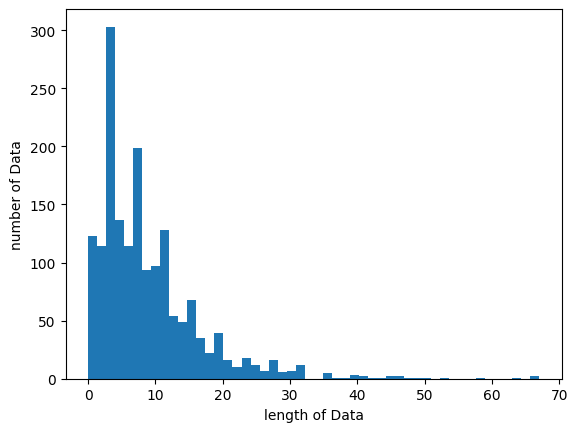

In [ ]:
print("test data의 최대 길이 : ", max(len(l) for l in token_X_test))
print("test data의 평균 길이 : ", sum(map(len, token_X_test))/ len(token_X_test))
plt.hist([len(s) for s in token_X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 50
below_threshold_len(max_len, del_X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.38900203665987


In [ ]:
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen = max_len)

In [ ]:
from keras.models import Sequential
model1 = Sequential()
model1.add(Embedding(vocab_size,64, input_length=max_len))
model1.add(Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01), kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(5, activation = 'softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02)))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            25408     
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 64)            20544     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 46,277
Trainable params: 46,277
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer=RMSprop(lr = .0005), loss='categorical_crossentropy', metrics=['acc'])
reLR = ReduceLROnPlateau(patience = 5, verbose=1, factor = .2)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 7)
mc = ModelCheckpoint(filepath = os.path.join('/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료', '1028_1.h5'), monitor='val_acc', mode='max', verbose=1, save_best_only=True, restore_best_weights = True)

In [ ]:
val_rate = 0.2
history1 = model1.fit(pad_X_train, del_y_train, epochs=30, batch_size= 64, shuffle = True, validation_split=val_rate, verbose = 1, callbacks=[es, mc, reLR])


Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 1.3904 - acc: 0.4297
Epoch 1: val_acc improved from -inf to 0.42748, saving model to /content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_1.h5
25/25 [==============================] - 5s 151ms/step - loss: 1.3904 - acc: 0.4297 - val_loss: 1.4280 - val_acc: 0.4275 - lr: 0.0010
Epoch 2/30
25/25 [==============================] - ETA: 0s - loss: 1.3870 - acc: 0.4297
Epoch 2: val_acc did not improve from 0.42748
25/25 [==============================] - 1s 51ms/step - loss: 1.3870 - acc: 0.4297 - val_loss: 1.4150 - val_acc: 0.4275 - lr: 0.0010
Epoch 3/30
25/25 [==============================] - ETA: 0s - loss: 1.3856 - acc: 0.4297
Epoch 3: val_acc did not improve from 0.42748
25/25 [==============================] - 1s 44ms/step - loss: 1.3856 - acc: 0.4297 - val_loss: 1.4137 - val_acc: 0.4275 - lr: 0.0010
Epoch 4/30
25/25 [==============================] - ETA: 0s - loss: 1.3859 - acc: 0.4297
Epoch 4: val_acc

In [ ]:
path = '/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료'
model1 = load_model( os.path.join(path, '1028_1.h5')) # val_acc = 0.8692
pred1 = model1.predict(pad_X_test)


54/54 [==============================] - 0s 3ms/step


In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length = max_len))
model2.add(Conv1D(64, 5, activation = 'relu',kernel_regularizer= l2(0.001)))
model2.add(MaxPooling1D(5))
model2.add(Dropout(.5))
model2.add(Conv1D(64, 5 ,activation = 'relu', kernel_regularizer=  l2(.001)))
model2.add(GlobalMaxPooling1D())
model2.add(BatchNormalization())
model2.add(Dense(5, activation = 'softmax', kernel_regularizer = l2(0.001)))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 64)            25408     
                                                                 
 conv1d_4 (Conv1D)           (None, 46, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 64)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 64)             0         
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 64)             20544     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                     

In [ ]:
model2.compile(optimizer = RMSprop(lr = .0005), loss = 'categorical_crossentropy', metrics = ['acc'])

callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1), ModelCheckpoint(filepath =  os.path.join(path, '1028_2.h5'), monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]
history2 = model2.fit(pad_X_train, del_y_train, epochs = 15, batch_size = 64, verbose = 1, validation_split = val_rate, callbacks=callback_ear)

Epoch 1/15
25/25 [==============================] - ETA: 0s - loss: 1.7590 - acc: 0.2578
Epoch 1: val_acc improved from -inf to 0.42748, saving model to /content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_2.h5
25/25 [==============================] - 4s 113ms/step - loss: 1.7590 - acc: 0.2578 - val_loss: 1.6552 - val_acc: 0.4275
Epoch 2/15
25/25 [==============================] - ETA: 0s - loss: 1.5169 - acc: 0.4475
Epoch 2: val_acc did not improve from 0.42748
25/25 [==============================] - 1s 54ms/step - loss: 1.5169 - acc: 0.4475 - val_loss: 1.5977 - val_acc: 0.4275
Epoch 3/15
25/25 [==============================] - ETA: 0s - loss: 1.2517 - acc: 0.5996
Epoch 3: val_acc did not improve from 0.42748
25/25 [==============================] - 1s 45ms/step - loss: 1.2517 - acc: 0.5996 - val_loss: 1.5419 - val_acc: 0.4275
Epoch 4/15
25/25 [==============================] - ETA: 0s - loss: 1.0339 - acc: 0.6715
Epoch 4: val_acc did not improve from 0.42748
25/25 [==

In [ ]:
model2 = load_model( os.path.join(path, '1028_2.h5')) # val_acc = 0.8786
pred2 = model2.predict(pad_X_test)


54/54 [==============================] - 0s 4ms/step


In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length = max_len))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(16))
model3.add(Dropout(0.4))
model3.add(Dense(5, activation='softmax'))
model3.summary()
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 64)            25408     
                                                                 
 conv1d_6 (Conv1D)           (None, 46, 32)            10272     
                                                                 
 conv1d_7 (Conv1D)           (None, 42, 32)            5152      
                                                                 
 conv1d_8 (Conv1D)           (None, 38, 32)            5152      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                      

In [ ]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath =  os.path.join(path, '1028_3.h5'), monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history3 = model3.fit(pad_X_train, del_y_train, epochs=30, batch_size=32, validation_split=val_rate, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 1.4616 - acc: 0.4188
Epoch 1: val_acc improved from -inf to 0.42748, saving model to /content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_3.h5
50/50 [==============================] - 11s 121ms/step - loss: 1.4616 - acc: 0.4188 - val_loss: 1.4159 - val_acc: 0.4275
Epoch 2/30
50/50 [==============================] - ETA: 0s - loss: 1.4191 - acc: 0.4201
Epoch 2: val_acc did not improve from 0.42748
50/50 [==============================] - 3s 59ms/step - loss: 1.4191 - acc: 0.4201 - val_loss: 1.4063 - val_acc: 0.4275
Epoch 3/30
50/50 [==============================] - ETA: 0s - loss: 1.3924 - acc: 0.4290
Epoch 3: val_acc did not improve from 0.42748
50/50 [==============================] - 1s 27ms/step - loss: 1.3924 - acc: 0.4290 - val_loss: 1.3559 - val_acc: 0.4275
Epoch 3: early stopping


In [ ]:
model3 = load_model( os.path.join(path, '1028_3.h5')) 


54/54 [==============================] - 1s 5ms/step


In [19]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.3 MB/s eta 0:00:00


In [20]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680534 sha256=0ea3e582b95de0c35fb7141baf16dce13dccd4465e99cb3095e2292d3ceed342
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [23]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt
import nltk # for english
import konlpy # for korean
from nltk.tokenize import TreebankWordTokenizer

from konlpy.tag import Kkma
from konlpy.corpus import kolaw
from konlpy.utils import pprint
from nltk import collocations

from wordcloud import WordCloud
from konlpy.tag import Twitter

In [24]:
import os
n_devices = torch.cuda.device_count()
print(n_devices)

for i in range(n_devices):
    print(torch.cuda.get_device_name(i))

1
Tesla T4


In [25]:
import nltk
nltk.download('all-corpora')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | D

True

In [26]:
preprocessed_df['text'][0]

'self convs1   nn ModuleList  nn Conv2d 1  Co   K  100   for K in Ks   1  여기서 커널사이즈 K 100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다'

In [27]:
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(preprocessed_df['text'], test_size=0.1, random_state=0)

print(len(dataset_train))
print(len(dataset_test))

3335
371


In [28]:
preprocessed_df['label']

0       0
1       1
2       0
3       0
4       0
       ..
3701    0
3702    3
3703    2
3704    4
3705    2
Name: label, Length: 3706, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
                                                         
dataset_train_y, dataset_test_y = train_test_split(preprocessed_df['label'], test_size=0.1, random_state=0)

print(len(dataset_train_y))
print(len(dataset_test_y))

3335
371


In [30]:
dataset_train_y = np.array(dataset_train_y.to_list())
dataset_test_y = np.array(dataset_test_y.to_list())

In [31]:
document_bert = ["[CLS] " + str(s) + " [SEP]" for s in dataset_train]
document_bert[:5]

['[CLS] 해당 캐글미션 제출물 확인차 문의드립니다  피티 만들어서 제출이 맞나요 [SEP]',
 '[CLS] 오늘 다른 에이블러 분들이 발표하시는 것을 보고 궁금한 점이 있어서 문의를 남깁니다   오늘 발표하신 분들을 보면  모두들 y값에 shift  로 두 달 이후의 데이터를 넣어서 예측 하신 것 같아서요  저도 처음에는 비슷한 방식으로 했지만 점수가 너무 안 나와서 다르게 해보자 라는 식으로 해서  나온 것이 예측값으로 다시 예측 데이터를 생성하는 방식이었습니다   그게 더 잘 나왔기 때문에 일단은 그 기준으로 발표를 하긴 했는데요  다른 분들 발표하시는 것 보니까 아예 제 생각이 틀렸는 것 같아서요  출발선부터 잘못된 것 같아서 질문 드립니다   제가 한 방식이 시계열 모델링으로써 완전 NG인 접근 방식이었을까요 [SEP]',
 '[CLS] 연도별 판매 현황 tmp06   sales groupby by  OrderYear   as index False    Amt    sum      시각화 plt figure figsize  5 5   plt bar tmp06  OrderYear    tmp06  Amt   10000000  plt title  연도별 판매 현황   size 20  pad 15  plt ticklabel format axis  y   style  plain   plt xticks rotation 0  plt xlabel  연도   plt ylabel  매출액 천만 원    plt show    시각화가 2015  2016  2017별로 표현되는 것이 아닌  25   5   75 이런 식으로 x축이 생성되는데 왜 이렇게 표현되는지 무엇이 문제인지 잘 모르겠습니다 [SEP]',
 '[CLS] 평가 방법의 내용을 보던중 동일 점수 일시 순위 선정에 대해 질문드립니다   1 기술능력평가 점수가 동일이고 2 기술능력의 세부평가항목 중 배점이 큰 항목에서 높은 점수를 얻을 자  3 배점이 동일할 경우에는 세부평가 사항 순서가 빠른 항목순으로 

In [32]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False,truncate=True)
tokenized_texts = [tokenizer.tokenize(s) for s in document_bert]
print(tokenized_texts[0])

['[CLS]', '해당', '캐', '##글', '##미', '##션', '제', '##출', '##물', '확인', '##차', '문', '##의', '##드', '##립', '##니다', '피', '##티', '만', '##들어', '##서', '제', '##출', '##이', '맞', '##나', '##요', '[SEP]']


In [132]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False,truncate=True)
y_test = [tokenizer.tokenize(s) for s in y_test]
print(y_test[0])

['[CLS]', '팀', '##즈', '##는', '노', '##트', '##북', '##으로', '접', '##속', '##하고', '강', '##의', '##는', '데', '##스', '##크', '##톱', '이', '##용', '##하', '##려', '##고', '하는', '##데', '문', '##제는', '없', '##을', '##까', '##요', '이', '경우', '##에는', '다', '##운', '##받', '##아', '##야', '되는', '파', '##일', '##이', '있을', '##까', '##요', '노', '##트', '##북', '트', '##래', '##픽', '##이', '많', '##아', '##지', '##면', '소', '##리', '##부', '##분', '끊', '##기', '##거나', '전체', '##화', '##면', '##을', '왔', '##다', '##갔다', '하', '##니', '##까', '놓', '##치는', '부', '##분', '##이', '있어서', '질', '##문', '##드', '##립', '##니다', '[SEP]']


In [33]:
MAX_LEN = 200
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', truncating='post', padding='post')
input_ids[0]

array([   101,  91621,   9792, 118663,  22458,  59095,   9672,  52363,
        29364,  84300,  23466,   9297,  10459,  15001,  35115,  48345,
         9946,  45725,   9248,  93200,  12424,   9672,  52363,  10739,
         9256,  16439,  48549,    102,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [133]:
MAX_LEN = 200
y_test = [tokenizer.convert_tokens_to_ids(x) for x in y_test]
y_test = pad_sequences(y_test, maxlen=MAX_LEN, dtype='long', truncating='post', padding='post')
y_test[0]

array([   101,   9899,  24891,  11018,   9022,  15184,  82512,  11467,
         9669,  43962,  12453,   8853,  10459,  11018,   9083,  12605,
        20308, 119361,   9638,  24974,  35506,  26737,  11664,  23969,
        28911,   9297,  87164,   9555,  10622, 118671,  48549,   9638,
        28467,  15303,   9056,  21614, 118965,  16985,  21711,  54780,
         9901,  18392,  10739,  68943, 118671,  48549,   9022,  15184,
        82512,   9890,  37388, 119414,  10739,   9249,  16985,  12508,
        14867,   9448,  12692,  14646,  37712,   8972,  12310,  55534,
        96567,  18227,  14867,  10622,   9594,  11903,  84986,   9952,
        25503, 118671,   9029,  72087,   9365,  37712,  10739,  90587,
         9709,  25934,  15001,  35115,  48345,    102,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [34]:
attention_masks = []

for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
    
print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [35]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, dataset_train_y, random_state=42, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=42, 
                                                       test_size=0.1)

In [36]:
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

In [143]:
validation_labels

tensor([0, 0, 2, 1, 0, 2, 3, 0, 2, 1, 0, 1, 1, 2, 3, 2, 0, 0, 2, 2, 2, 1, 3, 2,
        3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 4, 4, 0, 0, 0, 3, 0, 4, 1, 3,
        0, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 4, 1, 2, 2, 4, 0, 2, 0, 0, 0, 2,
        0, 0, 1, 0, 1, 4, 1, 0, 1, 2, 0, 0, 1, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0, 3,
        4, 0, 0, 2, 2, 3, 1, 2, 2, 0, 0, 0, 3, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0,
        2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 2, 3, 3, 1, 3, 1, 2, 3,
        0, 3, 0, 2, 0, 0, 0, 3, 3, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1,
        0, 0, 0, 3, 2, 3, 1, 0, 2, 2, 2, 0, 0, 2, 3, 2, 3, 0, 2, 0, 0, 3, 0, 2,
        0, 3, 3, 0, 3, 0, 0, 1, 0, 2, 0, 3, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0,
        2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 3, 0, 1, 3, 1, 2, 2, 1, 0, 1,
        0, 4, 0, 0, 0, 0, 0, 2, 3, 3, 3, 1, 1, 3, 3, 2, 0, 1, 3, 0, 0, 2, 1, 4,
        0, 0, 3, 1, 3, 0, 0, 1, 0, 2, 0,

In [37]:
BATCH_SIZE = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=BATCH_SIZE)

In [144]:
validation_data

In [38]:
sentences = dataset_test
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
labels = dataset_test_y

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = []
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(labels)
test_masks = torch.tensor(attention_masks)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [145]:
test_labels

tensor([2, 2, 2, 3, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 3, 2, 1, 3, 2, 3, 0, 1,
        3, 1, 3, 0, 3, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 3, 1, 2, 2, 1, 4, 3, 0,
        3, 0, 1, 3, 0, 2, 0, 2, 3, 0, 3, 2, 1, 1, 0, 0, 2, 3, 1, 3, 1, 0, 0, 2,
        2, 0, 0, 1, 3, 2, 2, 3, 1, 2, 3, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0,
        1, 3, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 3, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1,
        1, 4, 3, 3, 3, 1, 2, 0, 2, 2, 0, 0, 2, 2, 3, 0, 3, 0, 1, 0, 0, 0, 2, 2,
        3, 0, 2, 2, 3, 2, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0,
        1, 2, 2, 1, 2, 2, 3, 2, 1, 0, 3, 1, 1, 2, 0, 4, 3, 0, 3, 3, 0, 2, 0, 0,
        0, 1, 0, 1, 0, 0, 3, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 1, 3, 4, 1,
        0, 1, 1, 3, 2, 3, 3, 0, 3, 0, 2, 0, 2, 0, 0, 1, 3, 2, 0, 2, 2, 0, 2, 0,
        2, 0, 1, 1, 0, 2, 3, 2, 0, 3, 1, 0, 0, 0, 1, 3, 2, 0, 2, 1, 0, 1, 1, 2,
        3, 0, 2, 3, 1, 0, 0, 4, 2, 1, 2,

In [39]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [165]:
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=5)
model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [44]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 30

# 총 훈련 스텝
total_steps = len(train_dataloader) * epochs

# lr 조금씩 감소시키는 스케줄러
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [42]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# 시간 표시 함수
def format_time(elapsed):
    # 반올림
    elapsed_rounded = int(round((elapsed)))
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [45]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 30 ========
Training...

  Average training loss: 0.02
  Training epcoh took: 0:01:37

Running Validation...
  Accuracy: 0.81
  Validation took: 0:00:04

======== Epoch 2 / 30 ========
Training...

  Average training loss: 0.03
  Training epcoh took: 0:01:37

Running Validation...
  Accuracy: 0.81
  Validation took: 0:00:04

======== Epoch 3 / 30 ========
Training...

  Average training loss: 0.03
  Training epcoh took: 0:01:37

Running Validation...
  Accuracy: 0.83
  Validation took: 0:00:04

======== Epoch 4 / 30 ========
Training...

  Average training loss: 0.02
  Training epcoh took: 0:01:36

Running Validation...
  Accuracy: 0.78
  Validation took: 0:00:04

======== Epoch 5 / 30 ========
Training...

  Average training loss: 0.02
  Training epcoh took: 0:01:37

Running Validation...
  Accuracy: 0.82
  Validation took: 0:00:04

======== Epoch 6 / 30 ========
Training...

  Average training loss: 0.02
  Training epcoh took: 0:01:37

Running Validation...
  Accu

In [78]:
label_ids

array([1, 0, 2, 0, 1, 0, 0, 1, 0, 3, 1, 0, 3, 0])

In [54]:
def convert_input_data(sentences):
  tokenized_text = [tokenizer.tokenize(sent) for sent in sentences]
  Max_len = 128
  input_ids = [tokenizer.convert_tokens_to_ids(sent) for sent in tokenized_text]
  input_ids = pad_sequences(input_ids, maxlen = Max_len, padding = 'post', truncating='post',dtype = 'long')
  attention_mask = []
  for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_mask.append(seq_mask)
 
  inputs = torch.tensor(input_ids)
  masks = torch.tensor(attention_mask)
 
  return inputs, masks
 
 
 
def test_sentences(sentences):
  model.eval()
  inputs, masks = convert_input_data(sentences)
  b_input_ids = inputs.to(device)
  b_input_masks = masks.to(device)
  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids = None,
                    attention_mask = b_input_masks)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    return logits

    
 

In [136]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)
    
    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch
    
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))


Accuracy: 0.83
Test took: 0:00:04


In [146]:
test_labels

tensor([2, 2, 2, 3, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 3, 2, 1, 3, 2, 3, 0, 1,
        3, 1, 3, 0, 3, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 3, 1, 2, 2, 1, 4, 3, 0,
        3, 0, 1, 3, 0, 2, 0, 2, 3, 0, 3, 2, 1, 1, 0, 0, 2, 3, 1, 3, 1, 0, 0, 2,
        2, 0, 0, 1, 3, 2, 2, 3, 1, 2, 3, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0,
        1, 3, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 3, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1,
        1, 4, 3, 3, 3, 1, 2, 0, 2, 2, 0, 0, 2, 2, 3, 0, 3, 0, 1, 0, 0, 0, 2, 2,
        3, 0, 2, 2, 3, 2, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0,
        1, 2, 2, 1, 2, 2, 3, 2, 1, 0, 3, 1, 1, 2, 0, 4, 3, 0, 3, 3, 0, 2, 0, 0,
        0, 1, 0, 1, 0, 0, 3, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 1, 3, 4, 1,
        0, 1, 1, 3, 2, 3, 3, 0, 3, 0, 2, 0, 2, 0, 0, 1, 3, 2, 0, 2, 2, 0, 2, 0,
        2, 0, 1, 1, 0, 2, 3, 2, 0, 3, 1, 0, 0, 0, 1, 3, 2, 0, 2, 1, 0, 1, 1, 2,
        3, 0, 2, 3, 1, 0, 0, 4, 2, 1, 2,

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_labels))


ValueError: ignored

In [171]:
simple_model = torch.save(model.state_dict(), '/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_3.h5')
simple_model.predict(y_test)

AttributeError: ignored

In [179]:
y_test

array([[   101,   9899,  24891, ...,      0,      0,      0],
       [   101,   9438,  28396, ...,      0,      0,      0],
       [   101,    169,  26391, ...,      0,      0,      0],
       ...,
       [   101,   9521, 118741, ...,      0,      0,      0],
       [   101,  72894,   9246, ...,      0,      0,      0],
       [   101,    164,    112, ...,    165,  10414,  10575]])

In [180]:
loaded_model

NameError: ignored

In [178]:
loaded_model = tf.keras.models.load_model(model.state_dict(), '/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_3.h5')
y_predict = loaded_model.predict(y_test)

ValueError: ignored

In [182]:
model = load_model('./model/saved_model.hdf5', custom_objects={'Mish':Mish}

SyntaxError: ignored

In [184]:
model = load_model('/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_3.h5', custom_objects={'Mish':Mish}


SyntaxError: ignored

In [181]:

model = tf.keras.models.load_model('/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_3.h5')

##########모델 예측

x_test = np.array([
    [4, 6]
])

y_predict = model.predict(x_test)

label = labels[y_predict[0].argmax()]
confidence = y_predict[0][y_predict[0].argmax()]
print('{} {:.2f}%'.format(label, confidence * 100)) #

OSError: ignored

In [ ]:
# sub = pd.read_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/random_submission.csv")
# sub['topic_idx'] = final_logit.argmax(1)
# # preds
# sub.to_csv('./submission/final_submission.csv', index=False)

In [169]:
# def predict(self, x):
#     x = self.forward(x)
    
#     return x
simple_model = torch.load('/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/1028_3.h5')
simple_model.predict(y_test)

AttributeError: ignored

In [127]:
y_test

0      팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요   이...
1      셀프테스트에서 받은 점수가 해당 교육을 이수하고  취업 연계등을 하는데 있어서 영향...
2      a  int input  정수 A의 값을 입력하시오      b  int input...
3      def max4 a b c d       maximum   a     if b gt...
4                    i   2 가  i    2 와 왜 같은지가 이해가 잘 안됩니다
                             ...                        
924                               aice특강 ppt는 따로 안올려주시나요
925    안녕하세요   실습 중 궁금한 점이 있어 문의 드립니다    1  라벨 인코더 라벨...
926    안녕하세요  kT AIDU에서 전에 Associate 시험에 대해 공부할 수 있는 ...
927    app 마다 urls py 을 만들어서 관리하는게 더 좋은 코드인가요  아니면 se...
928    [팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요   ...
Name: text, Length: 929, dtype: object

In [ ]:
learner.validate(class_names=t.get_classes())


In [49]:
y_test = pd.read_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/test.csv")

In [50]:
y_test

,id,text
0,0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요? 이...
1,1,"셀프테스트에서 받은 점수가 해당 교육을 이수하고, 취업 연계등을 하는데 있어서 영향..."
2,2,a= int(input('정수 A의 값을 입력하시오.:'))\nb= int(inpu...
3,3,"def max4(a,b,c,d):\n maximum = a\n if b&..."
4,4,i**=2 가 i **=2 와 왜 같은지가 이해가 잘 안됩니다!!
...,...,...
924,924,aice특강 ppt는 따로 안올려주시나요?
925,925,안녕하세요~!\n실습 중 궁금한 점이 있어 문의 드립니다. \n\n1. 라벨 인코더...
926,926,안녕하세요.\nkT AIDU에서 전에 Associate 시험에 대해 공부할 수 있는...
927,927,app 마다 urls.py 을 만들어서 관리하는게 더 좋은 코드인가요?\n아니면 s...


In [ ]:
from sklearn.metrics import classification_report
y_true = test['label']
# F1 Score 확인
print(classification_report(y_true, np.round(test_set,0)))

In [112]:
import scipy.sparse

path = '/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/'

# pr -> w2v
x_pr_train = np.load(path + "X_pr_train.npy")
x_pr_val = np.load(path + "X_pr_val.npy")

# mor_sequence -> Sequence
x_mor_sequence_train = np.load(path + "X_mor_sequence_train.npy")
x_mor_sequence_val = np.load(path + "X_mor_sequence_val.npy")

# tfidf -> N-gram -> sparse
# .npz 파일에서 희소 행렬 데이터를 불러옴
x_tfidf_train = scipy.sparse.load_npz(path + "X_tfidf_train.npz")
x_tfidf_val = scipy.sparse.load_npz(path + "X_tfidf_val.npz")
# 행렬을 배열화
x_tfidf_train = x_tfidf_train.toarray()
x_tfidf_val = x_tfidf_val.toarray()

# # 0이 아닌 요소의 인덱스를 추출
# sparse_matrix = sp.load_npz('your_file.npz')
# nonzero_indices = sparse_matrix.nonzero()

In [113]:
import scipy
tfidf_train = scipy.sparse.load_npz(path + 'X_tfidf_train.npz')
tfidf_val = scipy.sparse.load_npz(path + 'X_tfidf_val.npz')

X_tfidf_train = tfidf_train.toarray()
X_tfidf_val = tfidf_val.toarray()

In [114]:
# KNN, SVC를 위해
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# StandardScaler를 이용한 정규화
scaler = StandardScaler()
x_pr_train_re = scaler.fit_transform(x_pr_train)
x_mor_sequence_train_re = scaler.fit_transform(x_mor_sequence_train)
x_tfidf_train_re = scaler.fit_transform(x_tfidf_train)

In [115]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [116]:
# 모델 선언
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
dt_model = DecisionTreeClassifier(random_state=777)
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
svc_model = SVC()

In [125]:
# 모델 학습
xgb_model.fit(x_tfidf_train, y_train)
lgbm_model.fit(x_tfidf_train, y_train)
dt_model.fit(x_tfidf_train, y_train)
rf_model.fit(x_tfidf_train, y_train)
knn_model.fit(x_tfidf_train_re, y_train)
lr_model.fit(x_tfidf_train, y_train)
svc_model.fit(x_tfidf_train_re, y_train)
clf_model.fit(x_tfidf_train, y_train)

ValueError: ignored

In [123]:
from sklearn.naive_bayes import MultinomialNB

# MultinomialNB를 사용하여 분류 모델을 학습함
clf_model = MultinomialNB()

In [120]:
path = '/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/'
# y_train과 y_val 불러오기"
y_train = pd.read_csv(path+'y_train.csv')['label']
y_val = pd.read_csv(path+'y_train.csv')['label']

In [118]:
y_test

0      팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요   이...
1      셀프테스트에서 받은 점수가 해당 교육을 이수하고  취업 연계등을 하는데 있어서 영향...
2      a  int input  정수 A의 값을 입력하시오      b  int input...
3      def max4 a b c d       maximum   a     if b gt...
4                    i   2 가  i    2 와 왜 같은지가 이해가 잘 안됩니다
                             ...                        
924                               aice특강 ppt는 따로 안올려주시나요
925    안녕하세요   실습 중 궁금한 점이 있어 문의 드립니다    1  라벨 인코더 라벨...
926    안녕하세요  kT AIDU에서 전에 Associate 시험에 대해 공부할 수 있는 ...
927    app 마다 urls py 을 만들어서 관리하는게 더 좋은 코드인가요  아니면 se...
928    [팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요   ...
Name: text, Length: 929, dtype: object